In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                                 
 outputLayer (Dense)         (None, 10201)             1315929   
                                                                 
 reshape_1 (Reshape)         (None, 101, 101)          0     

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.3512 - rmse: 0.4704
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3504 - rmse: 0.4701
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3495 - rmse: 0.4697
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3487 - rmse: 0.4694
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3478 - rmse: 0.4690
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3470 - rmse: 0.4686
Epoch 7/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3461 - rmse: 0.4682
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3452 - rmse: 0.4678
Epoch 9/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3444 - rmse: 0.4674
Epoch 10/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3435 - rmse: 0.4670
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 0.2148 - rmse: 0.3410
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2126 - rmse: 0.3381
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2105 - rmse: 0.3354
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2086 - rmse: 0.3329
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2067 - rmse: 0.3304
Epoch 91/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2047 - rmse: 0.3278
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2027 - rmse: 0.3251
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2007 - rmse: 0.3224
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1987 - rmse: 0.3197
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1968 - rmse: 0.3171
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.1381 - rmse: 0.2472
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1377 - rmse: 0.2470
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1373 - rmse: 0.2467
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1370 - rmse: 0.2465
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1366 - rmse: 0.2462
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1362 - rmse: 0.2459
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1358 - rmse: 0.2457
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1355 - rmse: 0.2455
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1352 - rmse: 0.2453
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1348 - rmse: 0.2451
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1110 - rmse: 0.2279
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1107 - rmse: 0.2276
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1104 - rmse: 0.2273
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1101 - rmse: 0.2271
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1098 - rmse: 0.2270
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1096 - rmse: 0.2268
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1092 - rmse: 0.2264
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1089 - rmse: 0.2261
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1086 - rmse: 0.2257
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1083 - rmse: 0.2255
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0896 - rmse: 0.2083
Epoch 339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0893 - rmse: 0.2080
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0891 - rmse: 0.2077
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0889 - rmse: 0.2074
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0886 - rmse: 0.2071
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0884 - rmse: 0.2068
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0882 - rmse: 0.2066
Epoch 345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0879 - rmse: 0.2063
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0877 - rmse: 0.2061
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0875 - rmse: 0.2060
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0724 - rmse: 0.1890
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0722 - rmse: 0.1886
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0720 - rmse: 0.1883
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0718 - rmse: 0.1880
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0716 - rmse: 0.1876
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0714 - rmse: 0.1873
Epoch 428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0712 - rmse: 0.1871
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0710 - rmse: 0.1869
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0709 - rmse: 0.1868
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0707 - rmse: 0.1866
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0575 - rmse: 0.1653
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0573 - rmse: 0.1649
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0571 - rmse: 0.1645
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0569 - rmse: 0.1642
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0567 - rmse: 0.1638
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0566 - rmse: 0.1636
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0564 - rmse: 0.1633
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0562 - rmse: 0.1629
Epoch 514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0560 - rmse: 0.1625
Epoch 515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0558 - rmse: 0.1621
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0442 - rmse: 0.1376
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0441 - rmse: 0.1374
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0440 - rmse: 0.1373
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0439 - rmse: 0.1372
Epoch 594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0439 - rmse: 0.1372
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0438 - rmse: 0.1373
Epoch 596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0438 - rmse: 0.1373
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0437 - rmse: 0.1374
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0436 - rmse: 0.1372
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0435 - rmse: 0.1370
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0347 - rmse: 0.1140
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0346 - rmse: 0.1137
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0345 - rmse: 0.1133
Epoch 677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0344 - rmse: 0.1130
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0343 - rmse: 0.1127
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0342 - rmse: 0.1126
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0341 - rmse: 0.1125
Epoch 681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0340 - rmse: 0.1123
Epoch 682/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0339 - rmse: 0.1120
Epoch 683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0338 - rmse: 0.1115
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0268 - rmse: 0.0881
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0267 - rmse: 0.0877
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0267 - rmse: 0.0873
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0266 - rmse: 0.0870
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0265 - rmse: 0.0867
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0264 - rmse: 0.0863
Epoch 764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0263 - rmse: 0.0860
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.0859
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.0856
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.0854
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0209 - rmse: 0.0615
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0209 - rmse: 0.0614
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.0613
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0208 - rmse: 0.0611
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0207 - rmse: 0.0606
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.0601
Epoch 848/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0206 - rmse: 0.0597
Epoch 849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0205 - rmse: 0.0593
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.0591
Epoch 851/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0204 - rmse: 0.0588
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - rmse: 0.0402
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.0400
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.0398
Epoch 929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0169 - rmse: 0.0396
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.0395
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.0394
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.0393
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.0391
Epoch 934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0168 - rmse: 0.0390
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.0389
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0146 - rmse: 0.0305
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.0303
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.0301
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0145 - rmse: 0.0300
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0298
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0297
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0145 - rmse: 0.0296
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.0294
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.0292
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0144 - rmse: 0.0290
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.0240
Epoch 1094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0127 - rmse: 0.0240
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.0240
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0240
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0240
Epoch 1098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.0241
Epoch 1099/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0126 - rmse: 0.0241
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.0242
Epoch 1101/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.0243
Epoch 1102/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0125 - rmse: 0.0244
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0230
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0230
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0230
Epoch 1179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0230
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0230
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0231
Epoch 1182/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.0230
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0229
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0228
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.0228
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0220
Epoch 1260/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0219
Epoch 1261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0218
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0218
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0218
Epoch 1264/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0218
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0218
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0218
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0217
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0217
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0197
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0198
Epoch 1344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0198
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0198
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0194
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0193
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0191
Epoch 1428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0189
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0186
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0185
Epoch 1431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0186
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0186
Epoch 1433/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0185
Epoch 1434/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0184
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0180
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0180
Epoch 1510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0181
Epoch 1511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0182
Epoch 1512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0183
Epoch 1513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0184
Epoch 1514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0183
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0183
Epoch 1516/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0183
Epoch 1517/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0183
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0172
Epoch 1592/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0173
Epoch 1593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0174
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0175
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0176
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0175
Epoch 1597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0175
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0176
Epoch 1599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0176
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0177
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0186
Epoch 1675/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0186
Epoch 1676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0185
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0185
Epoch 1678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0185
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0185
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0185
Epoch 1681/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0186
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0186
Epoch 1683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0187
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0178
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0179
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0178
Epoch 1760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0177
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0175
Epoch 1762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0174
Epoch 1763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0174
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0174
Epoch 1765/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0174
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0175
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0176
Epoch 1841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0177
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0178
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0179
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0179
Epoch 1845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0180
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0181
Epoch 1847/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0182
Epoch 1848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0183
Epoch 1849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0185
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0172
Epoch 1924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0173
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0174
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0175
Epoch 1927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0174
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0172
Epoch 1929/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0172
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0171
Epoch 1931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0171
Epoch 1932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0171
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0174
Epoch 2007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0175
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0176
Epoch 2009/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0176
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0176
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0175
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0174
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0173
Epoch 2014/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0173
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0173
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0160
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0160
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0161
Epoch 2092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0164
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0166
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0167
Epoch 2095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0166
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0165
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0163
Epoch 2098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0160
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0167
Epoch 2173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0168
Epoch 2174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0169
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0168
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0166
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0165
Epoch 2178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0164
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0164
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0164
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0164
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0162
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0163
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0165
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0166
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0163
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0158
Epoch 2261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0152
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0150
Epoch 2263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0152
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0158
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0148
Epoch 2339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0149
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0150
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0153
Epoch 2342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0154
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0154
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0155
Epoch 2345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0156
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0155
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0154
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0149
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0150
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0150
Epoch 2424/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0149
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0149
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0150
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0150
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0149
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0151
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0156
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0139
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0142
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0145
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0141
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0138
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0137
Epoch 2510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0143
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0148
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0155
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0158
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0148
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0148
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0149
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0149
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0147
Epoch 2592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0147
Epoch 2593/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0148
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0150
Epoch 2595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0151
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0149
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0143
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0135
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0130
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0135
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0144
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0150
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0146
Epoch 2677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0136
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0130
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0128
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0128
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0129
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0131
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0131
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0129
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0127
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0127
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0127
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0131
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0135
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0170
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0148
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0132
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0126
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0130
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0138
Epoch 2842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0140
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0136
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0130
Epoch 2845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0126
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0142
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0147
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0146
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0141
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0136
Epoch 2924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0135
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0139
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0145
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0150
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0151
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0133
Epoch 3003/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0016 - rmse: 0.0133
Epoch 3004/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0016 - rmse: 0.0132
Epoch 3005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0131
Epoch 3006/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0016 - rmse: 0.0131
Epoch 3007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0132
Epoch 3008/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0133
Epoch 3009/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0136
Epoch 3010/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0016 - rmse: 0.0138
Epoch 3011/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0137
Epoch 3012/10000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0127
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0129
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0139
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0153
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0164
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0168
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0163
Epoch 3092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0147
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0130
Epoch 3094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0121
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0135
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0136
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0137
Epoch 3171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0138
Epoch 3172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0139
Epoch 3173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0139
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0139
Epoch 3175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0137
Epoch 3176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0137
Epoch 3177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0138
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0128
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0127
Epoch 3253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0124
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0119
Epoch 3255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0117
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0119
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0121
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0121
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0121
Epoch 3260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0121
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0123
Epoch 3335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0124
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0125
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0126
Epoch 3338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0127
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0128
Epoch 3340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0129
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0130
Epoch 3342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0133
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0136
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0126
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0122
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0126
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0134
Epoch 3421/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0141
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0143
Epoch 3423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0138
Epoch 3424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0132
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0128
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0126
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0123
Epoch 3501/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0122
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0123
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0124
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0124
Epoch 3505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0125
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0128
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0126
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0125
Epoch 3509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0128
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0123
Epoch 3586/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0137
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0146
Epoch 3588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0152
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0149
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0133
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0118
Epoch 3592/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0115
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0136
Epoch 3667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0138
Epoch 3668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0132
Epoch 3669/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0124
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0120
Epoch 3671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0121
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0128
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0136
Epoch 3674/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0133
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0127
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0118
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0127
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0126
Epoch 3754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0120
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0112
Epoch 3757/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0118
Epoch 3758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0130
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0124
Epoch 3833/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0125
Epoch 3834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0130
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0137
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0143
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0142
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0137
Epoch 3839/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0134
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0132
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0131
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0130
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0131
Epoch 3917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 3918/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 3920/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0124
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0134
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0136
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0136
Epoch 3924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0133
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0142
Epoch 3999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 4000/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0110
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 4002/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0126
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0132
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0130
Epoch 4005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0125
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0117
Epoch 4007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0113
Epoch 4082/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0110
Epoch 4083/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0113
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0120
Epoch 4085/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0127
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0129
Epoch 4087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0125
Epoch 4088/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0119
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 4090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0113
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 4166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0114
Epoch 4167/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0115
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0117
Epoch 4169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 4170/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0115
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0115
Epoch 4172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0148
Epoch 4248/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0135
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0116
Epoch 4250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0112
Epoch 4251/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0123
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0129
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0127
Epoch 4254/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0115
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0111
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0133
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0109
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4332/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0107
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4336/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0107
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0107
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0105
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0119
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0121
Epoch 4415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0117
Epoch 4416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0113
Epoch 4417/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0113
Epoch 4418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0117
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0112
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0110
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 4498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0117
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 4502/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 4503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0122
Epoch 4504/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0121
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4580/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4581/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0131
Epoch 4583/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0141
Epoch 4584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0131
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 4586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4587/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0109
Epoch 4588/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0110
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0111
Epoch 4664/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0112
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0113
Epoch 4666/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 4667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0119
Epoch 4668/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 4669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0116
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0112
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0113
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4746/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0111
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0121
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0132
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0133
Epoch 4751/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 4752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0105
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0105
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 4830/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0128
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0134
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0133
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0127
Epoch 4834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0112
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0128
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0113
Epoch 4912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0108
Epoch 4913/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0105
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0107
Epoch 4917/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0107
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 4995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0113
Epoch 4996/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0111
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 4998/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5000/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 5001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0115
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0116
Epoch 5003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0117
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0119
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 5079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 5080/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5084/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 5161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0105
Epoch 5164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5167/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0117
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0115
Epoch 5248/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0120
Epoch 5249/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0118
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0116
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0123
Epoch 5327/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5328/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 5329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0102
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5331/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5332/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0114
Epoch 5333/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0142
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0129
Epoch 5411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0116
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0105
Epoch 5413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5416/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5417/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0116
Epoch 5493/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0114
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5496/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5497/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0119
Epoch 5498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0119
Epoch 5499/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0117
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0114
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0117
Epoch 5577/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0127
Epoch 5578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0133
Epoch 5579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0132
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0124
Epoch 5581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5582/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0105
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5660/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5662/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0111
Epoch 5665/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0116
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0105
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 5745/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5746/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5747/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5748/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0119
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0124
Epoch 5827/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0119
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0105
Epoch 5830/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0101
Epoch 5831/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 5832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0102
Epoch 5909/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0101
Epoch 5910/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0109
Epoch 5913/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 5915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 5992/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0104
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 5994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0114
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0115
Epoch 5997/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0113
Epoch 5998/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0120
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0110
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0112
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0114
Epoch 6076/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 6077/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6079/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6081/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0100
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0099
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0097
Epoch 6158/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6159/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0106
Epoch 6160/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0097
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0103
Epoch 6165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0107
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6243/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 6248/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0100
Epoch 6323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0115
Epoch 6324/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0134
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0131
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0121
Epoch 6327/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 6330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0096
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 6407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0106
Epoch 6408/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0105
Epoch 6411/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0124
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0147
Epoch 6413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0158
Epoch 6414/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0152
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0091
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0091
Epoch 6490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0099
Epoch 6491/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0102
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 6493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0091
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0087
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0087
Epoch 6496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0091
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0092
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 6572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0089
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0090
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0090
Epoch 6575/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0090
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0090
Epoch 6577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0090
Epoch 6578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0092
Epoch 6579/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0096
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 6657/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 6658/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 6659/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0092
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0105
Epoch 6663/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0099
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 6741/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 6745/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 6746/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0097
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0112
Epoch 6821/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0109
Epoch 6823/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6824/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0112
Epoch 6827/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0113
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0112
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0109
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0105
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 6906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 6907/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0105
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0106
Epoch 6911/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0106
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0111
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 6987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0099
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0097
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0097
Epoch 6990/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0097
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0096
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0096
Epoch 6993/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0100
Epoch 6995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0099
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 7070/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0109
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0109
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 7075/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0118
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0148
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0160
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0116
Epoch 7153/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 7154/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0100
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 7158/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0093
Epoch 7159/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0092
Epoch 7160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0095
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0118
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0116
Epoch 7237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0111
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 7239/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 7240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0127
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0145
Epoch 7242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0135
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0110
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0098
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0099
Epoch 7319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 7321/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 7322/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 7325/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0094
Epoch 7326/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 7327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0094
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0100
Epoch 7403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0105
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0099
Epoch 7406/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0098
Epoch 7407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0106
Epoch 7408/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0114
Epoch 7409/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0119
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0117
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0132
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0122
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 7487/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0115
Epoch 7490/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0111
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0099
Epoch 7493/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0111
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0104
Epoch 7569/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0101
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0108
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0112
Epoch 7572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0109
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0101
Epoch 7575/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0108
Epoch 7576/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0115
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0102
Epoch 7651/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0103
Epoch 7652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0095
Epoch 7653/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0093
Epoch 7654/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0104
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0107
Epoch 7656/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7657/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 7658/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 7659/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0092
Epoch 7734/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0097
Epoch 7735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 7736/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0098
Epoch 7737/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7739/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0097
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0098
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0099
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 7818/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 7819/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7820/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7821/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7822/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 7823/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0104
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0110
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0098
Epoch 7900/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0101
Epoch 7901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0098
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7903/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0096
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0105
Epoch 7908/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0111
Epoch 7983/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0114
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 7985/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0087
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 7987/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0094
Epoch 7988/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0092
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0091
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0089
Epoch 7991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0089
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 8066/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0091
Epoch 8068/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0095
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0095
Epoch 8070/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0093
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0088
Epoch 8073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0090
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0094
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0104
Epoch 8149/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0105
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0104
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0101
Epoch 8152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0101
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 8155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 8156/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9888e-04 - rmse: 0.0098
Epoch 8157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0099
Epoch 8158/10000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 9.9780e-04 - rmse: 0.0096
Epoch 8232/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9589e-04 - rmse: 0.0095
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0101
Epoch 8234/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0100
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9723e-04 - rmse: 0.0094
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9130e-04 - rmse: 0.0089
Epoch 8237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0093
Epoch 8238/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0103
Epoch 8239/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0105
Epoch 8240/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0097
Epoch 8241/10000
2/2 

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0114
Epoch 8313/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0113
Epoch 8314/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0108
Epoch 8315/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0102
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9043e-04 - rmse: 0.0098
Epoch 8317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0107
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0119
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0117
Epoch 8320/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0105
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8909e-04 - rmse: 0.0096
Epoch 8322/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 9.9799e-04 - rmse: 0.0104
Epoch 8394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0109
Epoch 8395/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0109
Epoch 8396/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0105
Epoch 8397/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9055e-04 - rmse: 0.0101
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8794e-04 - rmse: 0.0101
Epoch 8399/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8893e-04 - rmse: 0.0102
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8701e-04 - rmse: 0.0101
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8865e-04 - rmse: 0.0101
Epoch 8402/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8769e-04 - rmse: 0.0100
Epoch 840

2/2 [==============================] - 0s 3ms/step - loss: 9.7973e-04 - rmse: 0.0093
Epoch 8475/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8388e-04 - rmse: 0.0095
Epoch 8476/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9110e-04 - rmse: 0.0098
Epoch 8477/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7927e-04 - rmse: 0.0093
Epoch 8478/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9642e-04 - rmse: 0.0103
Epoch 8479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0129
Epoch 8480/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0126
Epoch 8481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0111
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9216e-04 - rmse: 0.0094
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8173e-04 - rmse: 0.0085
Epoch 848

2/2 [==============================] - 0s 3ms/step - loss: 9.9340e-04 - rmse: 0.0097
Epoch 8556/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8596e-04 - rmse: 0.0093
Epoch 8557/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7978e-04 - rmse: 0.0090
Epoch 8558/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7700e-04 - rmse: 0.0089
Epoch 8559/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7513e-04 - rmse: 0.0089
Epoch 8560/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7452e-04 - rmse: 0.0089
Epoch 8561/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7445e-04 - rmse: 0.0089
Epoch 8562/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7445e-04 - rmse: 0.0090
Epoch 8563/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7586e-04 - rmse: 0.0091
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7939e-04 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 9.7786e-04 - rmse: 0.0086
Epoch 8637/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7397e-04 - rmse: 0.0085
Epoch 8638/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7152e-04 - rmse: 0.0085
Epoch 8639/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7087e-04 - rmse: 0.0086
Epoch 8640/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7065e-04 - rmse: 0.0087
Epoch 8641/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7038e-04 - rmse: 0.0088
Epoch 8642/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7152e-04 - rmse: 0.0089
Epoch 8643/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7491e-04 - rmse: 0.0091
Epoch 8644/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7736e-04 - rmse: 0.0093
Epoch 8645/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7771e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.7133e-04 - rmse: 0.0093
Epoch 8717/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6623e-04 - rmse: 0.0091
Epoch 8718/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7967e-04 - rmse: 0.0100
Epoch 8719/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0111
Epoch 8720/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9094e-04 - rmse: 0.0105
Epoch 8721/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7436e-04 - rmse: 0.0095
Epoch 8722/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6723e-04 - rmse: 0.0089
Epoch 8723/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6694e-04 - rmse: 0.0087
Epoch 8724/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6935e-04 - rmse: 0.0088
Epoch 8725/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7070e-04 - rmse: 0.0088
E

2/2 [==============================] - 0s 4ms/step - loss: 9.7171e-04 - rmse: 0.0088
Epoch 8797/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6551e-04 - rmse: 0.0086
Epoch 8798/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6602e-04 - rmse: 0.0087
Epoch 8799/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6687e-04 - rmse: 0.0087
Epoch 8800/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6789e-04 - rmse: 0.0087
Epoch 8801/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7075e-04 - rmse: 0.0089
Epoch 8802/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7129e-04 - rmse: 0.0089
Epoch 8803/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6670e-04 - rmse: 0.0086
Epoch 8804/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6300e-04 - rmse: 0.0083
Epoch 8805/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.7280e-04 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 9.5838e-04 - rmse: 0.0085
Epoch 8877/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5881e-04 - rmse: 0.0085
Epoch 8878/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6134e-04 - rmse: 0.0086
Epoch 8879/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5918e-04 - rmse: 0.0085
Epoch 8880/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6004e-04 - rmse: 0.0086
Epoch 8881/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6047e-04 - rmse: 0.0086
Epoch 8882/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5855e-04 - rmse: 0.0084
Epoch 8883/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5933e-04 - rmse: 0.0084
Epoch 8884/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5926e-04 - rmse: 0.0084
Epoch 8885/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5801e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.5398e-04 - rmse: 0.0089
Epoch 8957/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6217e-04 - rmse: 0.0094
Epoch 8958/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8311e-04 - rmse: 0.0105
Epoch 8959/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8574e-04 - rmse: 0.0105
Epoch 8960/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7261e-04 - rmse: 0.0097
Epoch 8961/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6804e-04 - rmse: 0.0094
Epoch 8962/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.8215e-04 - rmse: 0.0101
Epoch 8963/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9529e-04 - rmse: 0.0106
Epoch 8964/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7524e-04 - rmse: 0.0094
Epoch 8965/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6135e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.5270e-04 - rmse: 0.0093
Epoch 9037/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5259e-04 - rmse: 0.0094
Epoch 9038/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5403e-04 - rmse: 0.0094
Epoch 9039/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5635e-04 - rmse: 0.0095
Epoch 9040/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5815e-04 - rmse: 0.0097
Epoch 9041/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5905e-04 - rmse: 0.0097
Epoch 9042/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5861e-04 - rmse: 0.0097
Epoch 9043/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5550e-04 - rmse: 0.0096
Epoch 9044/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5359e-04 - rmse: 0.0096
Epoch 9045/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6061e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 9.5197e-04 - rmse: 0.0089
Epoch 9117/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4941e-04 - rmse: 0.0087
Epoch 9118/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4998e-04 - rmse: 0.0087
Epoch 9119/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4964e-04 - rmse: 0.0086
Epoch 9120/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4911e-04 - rmse: 0.0087
Epoch 9121/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4955e-04 - rmse: 0.0087
Epoch 9122/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4820e-04 - rmse: 0.0086
Epoch 9123/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5455e-04 - rmse: 0.0089
Epoch 9124/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5222e-04 - rmse: 0.0088
Epoch 9125/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4834e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.4613e-04 - rmse: 0.0096
Epoch 9197/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5357e-04 - rmse: 0.0099
Epoch 9198/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5589e-04 - rmse: 0.0100
Epoch 9199/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4565e-04 - rmse: 0.0093
Epoch 9200/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4437e-04 - rmse: 0.0090
Epoch 9201/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6114e-04 - rmse: 0.0098
Epoch 9202/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7891e-04 - rmse: 0.0106
Epoch 9203/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6619e-04 - rmse: 0.0100
Epoch 9204/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4619e-04 - rmse: 0.0092
Epoch 9205/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4293e-04 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.3987e-04 - rmse: 0.0088
Epoch 9277/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5527e-04 - rmse: 0.0095
Epoch 9278/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7387e-04 - rmse: 0.0103
Epoch 9279/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6898e-04 - rmse: 0.0101
Epoch 9280/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5505e-04 - rmse: 0.0095
Epoch 9281/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4222e-04 - rmse: 0.0090
Epoch 9282/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4062e-04 - rmse: 0.0091
Epoch 9283/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4532e-04 - rmse: 0.0094
Epoch 9284/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4354e-04 - rmse: 0.0094
Epoch 9285/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3857e-04 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 9.4237e-04 - rmse: 0.0093
Epoch 9357/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3581e-04 - rmse: 0.0089
Epoch 9358/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3548e-04 - rmse: 0.0088
Epoch 9359/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3772e-04 - rmse: 0.0089
Epoch 9360/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4215e-04 - rmse: 0.0092
Epoch 9361/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4360e-04 - rmse: 0.0093
Epoch 9362/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4048e-04 - rmse: 0.0092
Epoch 9363/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3687e-04 - rmse: 0.0092
Epoch 9364/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3572e-04 - rmse: 0.0092
Epoch 9365/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3631e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0173
Epoch 9437/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0123
Epoch 9438/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3812e-04 - rmse: 0.0088
Epoch 9439/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7964e-04 - rmse: 0.0105
Epoch 9440/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0135
Epoch 9441/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0137
Epoch 9442/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7625e-04 - rmse: 0.0104
Epoch 9443/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4451e-04 - rmse: 0.0090
Epoch 9444/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9294e-04 - rmse: 0.0116
Epoch 9445/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0122
Epoch 9446/10000


2/2 [==============================] - 0s 4ms/step - loss: 9.4351e-04 - rmse: 0.0086
Epoch 9517/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3193e-04 - rmse: 0.0081
Epoch 9518/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3396e-04 - rmse: 0.0085
Epoch 9519/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3648e-04 - rmse: 0.0087
Epoch 9520/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3975e-04 - rmse: 0.0090
Epoch 9521/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5670e-04 - rmse: 0.0099
Epoch 9522/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6510e-04 - rmse: 0.0104
Epoch 9523/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5025e-04 - rmse: 0.0096
Epoch 9524/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3207e-04 - rmse: 0.0084
Epoch 9525/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3024e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.3143e-04 - rmse: 0.0097
Epoch 9597/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2707e-04 - rmse: 0.0095
Epoch 9598/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2933e-04 - rmse: 0.0097
Epoch 9599/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5787e-04 - rmse: 0.0111
Epoch 9600/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9262e-04 - rmse: 0.0125
Epoch 9601/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6566e-04 - rmse: 0.0112
Epoch 9602/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2978e-04 - rmse: 0.0091
Epoch 9603/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3125e-04 - rmse: 0.0090
Epoch 9604/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4903e-04 - rmse: 0.0098
Epoch 9605/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4325e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0122
Epoch 9677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0142
Epoch 9678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0137
Epoch 9679/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8411e-04 - rmse: 0.0107
Epoch 9680/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2991e-04 - rmse: 0.0082
Epoch 9681/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4657e-04 - rmse: 0.0095
Epoch 9682/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7143e-04 - rmse: 0.0109
Epoch 9683/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5823e-04 - rmse: 0.0103
Epoch 9684/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2954e-04 - rmse: 0.0086
Epoch 9685/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2405e-04 - rmse: 0.0082
Epoch 968

2/2 [==============================] - 0s 4ms/step - loss: 9.2234e-04 - rmse: 0.0081
Epoch 9757/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2289e-04 - rmse: 0.0081
Epoch 9758/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3529e-04 - rmse: 0.0087
Epoch 9759/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3752e-04 - rmse: 0.0089
Epoch 9760/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2778e-04 - rmse: 0.0086
Epoch 9761/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2511e-04 - rmse: 0.0085
Epoch 9762/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1783e-04 - rmse: 0.0083
Epoch 9763/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2838e-04 - rmse: 0.0090
Epoch 9764/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4219e-04 - rmse: 0.0098
Epoch 9765/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3557e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.3763e-04 - rmse: 0.0099
Epoch 9837/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3365e-04 - rmse: 0.0098
Epoch 9838/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2009e-04 - rmse: 0.0092
Epoch 9839/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1430e-04 - rmse: 0.0090
Epoch 9840/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1941e-04 - rmse: 0.0094
Epoch 9841/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3381e-04 - rmse: 0.0102
Epoch 9842/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2612e-04 - rmse: 0.0098
Epoch 9843/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1400e-04 - rmse: 0.0089
Epoch 9844/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2926e-04 - rmse: 0.0096
Epoch 9845/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4856e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 9.1620e-04 - rmse: 0.0090
Epoch 9917/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.3074e-04 - rmse: 0.0097
Epoch 9918/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3562e-04 - rmse: 0.0100
Epoch 9919/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2825e-04 - rmse: 0.0097
Epoch 9920/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1855e-04 - rmse: 0.0093
Epoch 9921/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1461e-04 - rmse: 0.0092
Epoch 9922/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1541e-04 - rmse: 0.0094
Epoch 9923/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2141e-04 - rmse: 0.0098
Epoch 9924/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2634e-04 - rmse: 0.0101
Epoch 9925/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1964e-04 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.1158e-04 - rmse: 0.0087
Epoch 9997/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0895e-04 - rmse: 0.0087
Epoch 9998/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2023e-04 - rmse: 0.0095
Epoch 9999/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5598e-04 - rmse: 0.0113
Epoch 10000/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8354e-04 - rmse: 0.0125


In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:42.302020


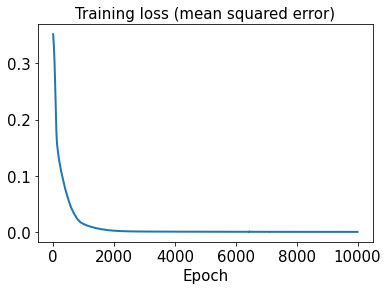

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

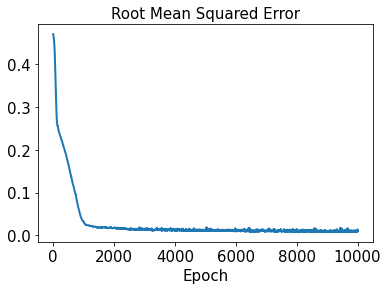

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 85ms/step - loss: 8.2889e-04 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.02379935785253923


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.019173404479694147


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.03069598262177028, 0.005037413348379197, 0.024878365528139042, 0.027476172577580334, 0.0319604546688559, 0.018246591884479246, 0.03197605626926033, 0.03123207656078401, 0.03229037530592634, 0.02561708787914725, 0.02822919444434382, 0.031217315515064736, 0.027353615802573956, 0.0009107323071832409, 0.024888293061793583, 0.02443661900772796, 0.03150285102483226, 0.023539805275736535, 0.017935556666078448, 0.031692302562265275, 0.017992642581290193, 0.011735862117027, 0.022216827823392505, 0.01764251693042608, 0.030089110813978248, 0.02180286341950868, 0.01960162132889386, 0.030953988655286757, 0.026777457468850515, 0.009828587031366609, 0.031048869735360557, 0.029302811934170205, 0.012912779960867904]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.018623213979260724, 0.029539125993215825, 0.01424583332547708, 0.02190685497636253, 0.005872718365356677, 0.0015455695877992462, 0.029237601806488735, 0.006975813081315981]


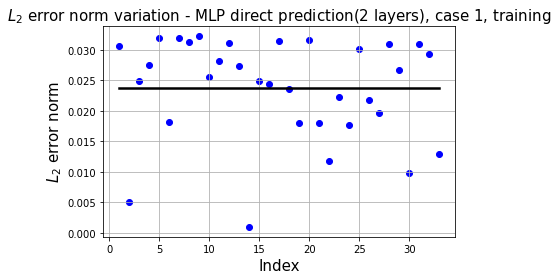

In [33]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

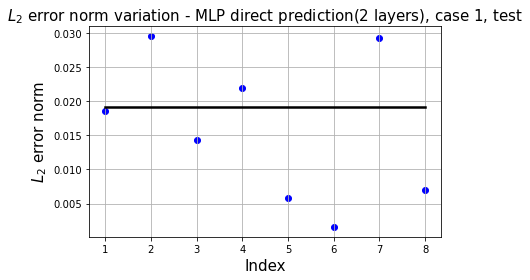

In [34]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

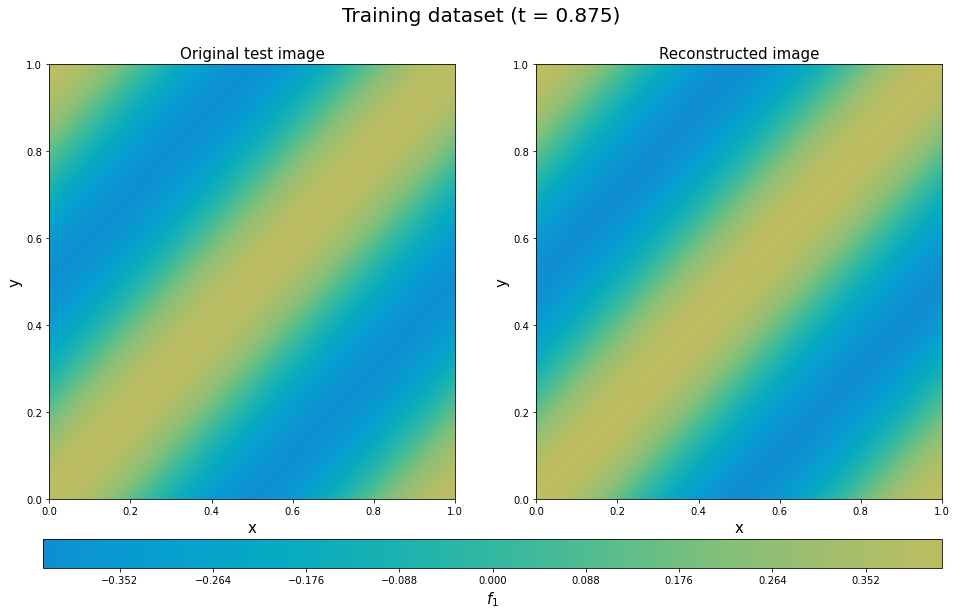

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

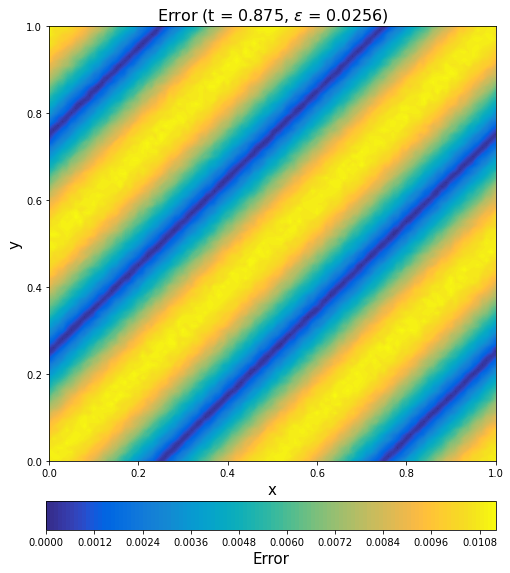

In [105]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.875, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

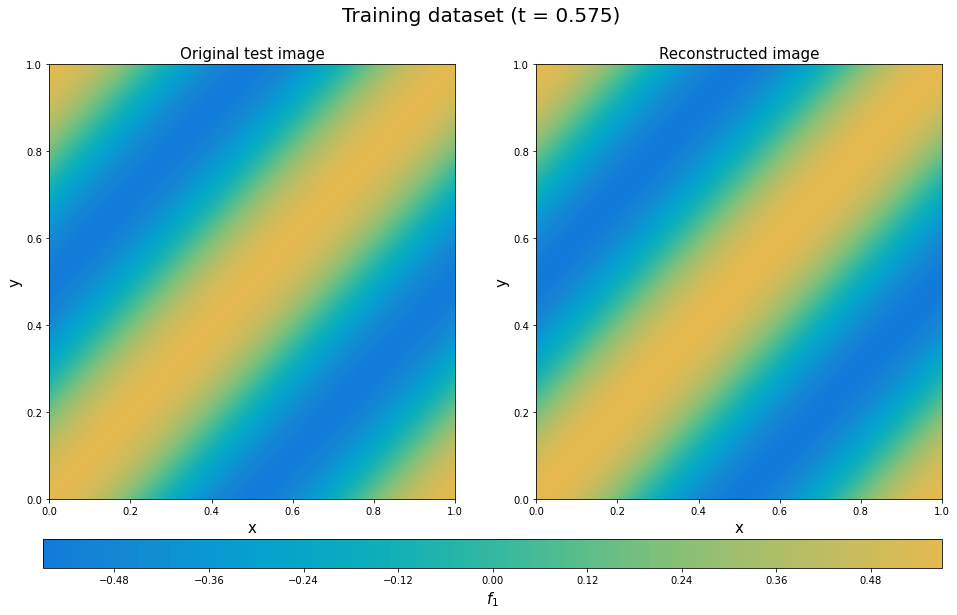

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

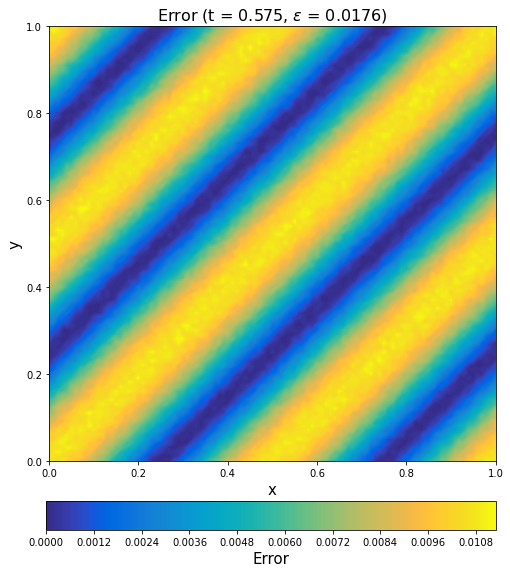

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

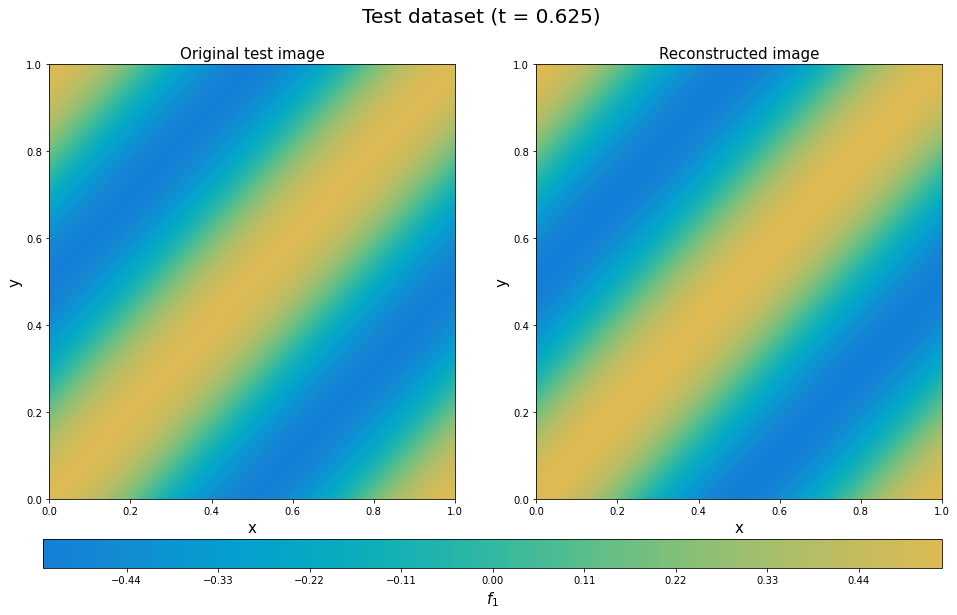

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

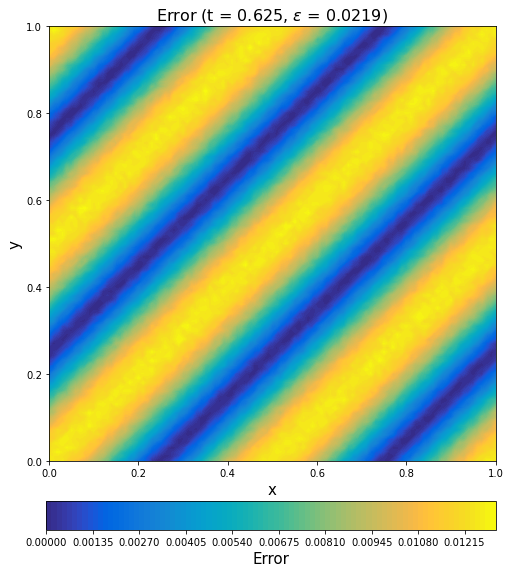

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

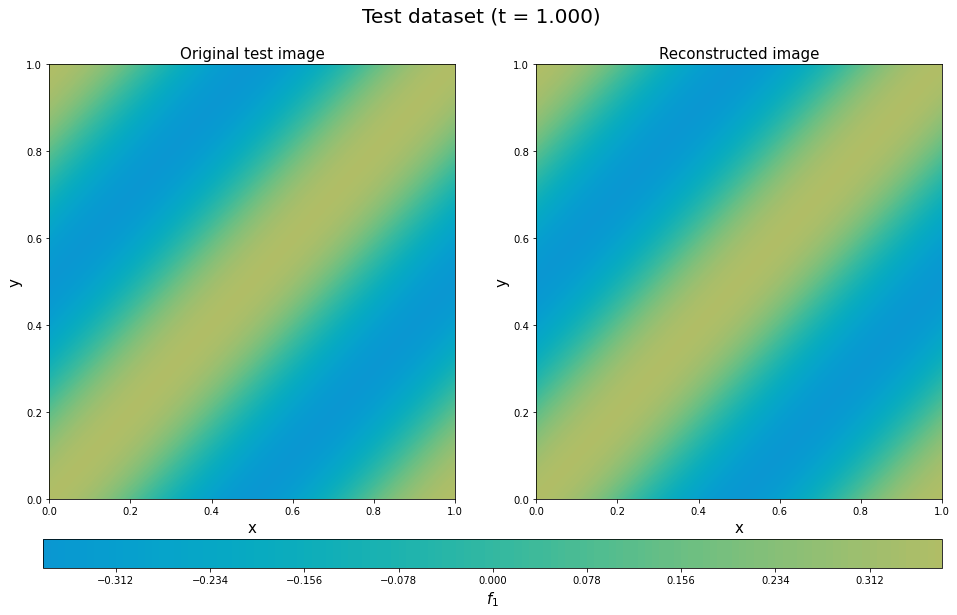

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

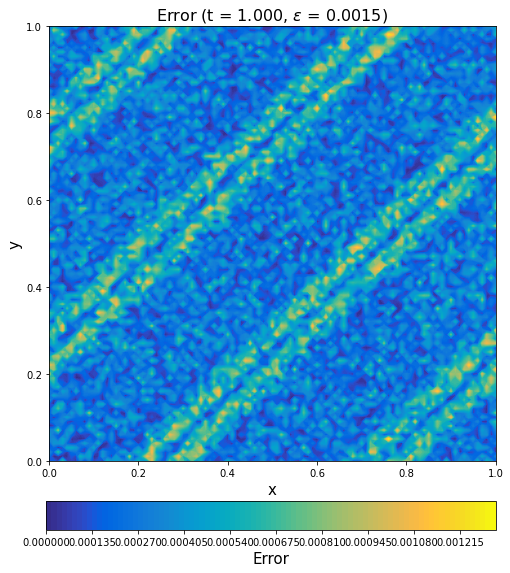

In [106]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

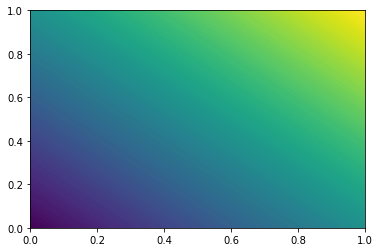

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.7043 - rmse: 1.6442
Epoch 2/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6896 - rmse: 1.6397
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6753 - rmse: 1.6354
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6616 - rmse: 1.6312
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6485 - rmse: 1.6272
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6359 - rmse: 1.6233
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6238 - rmse: 1.6195
Epoch 8/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6121 - rmse: 1.6159
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6009 - rmse: 1.6125
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5900 - rmse: 1.6091
Epoch 11/10000
2/2 [============================

2/2 [==============================] - 0s 4ms/step - loss: 2.2400 - rmse: 1.4963
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2329 - rmse: 1.4939
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2256 - rmse: 1.4915
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2183 - rmse: 1.4890
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2110 - rmse: 1.4866
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2038 - rmse: 1.4841
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1963 - rmse: 1.4816
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1887 - rmse: 1.4790
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1810 - rmse: 1.4764
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1729 - rmse: 1.4737
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 1.0908 - rmse: 1.0431
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0734 - rmse: 1.0347
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0561 - rmse: 1.0263
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0386 - rmse: 1.0177
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0212 - rmse: 1.0091
Epoch 175/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0034 - rmse: 1.0002
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9862 - rmse: 0.9915
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9684 - rmse: 0.9826
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9510 - rmse: 0.9736
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9331 - rmse: 0.9644
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1371 - rmse: 0.3627
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1331 - rmse: 0.3571
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1293 - rmse: 0.3517
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1257 - rmse: 0.3464
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1221 - rmse: 0.3412
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1186 - rmse: 0.3361
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1153 - rmse: 0.3310
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1121 - rmse: 0.3261
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1090 - rmse: 0.3214
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1060 - rmse: 0.3166
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0275 - rmse: 0.1448
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0273 - rmse: 0.1441
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0271 - rmse: 0.1435
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0269 - rmse: 0.1428
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0268 - rmse: 0.1423
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0266 - rmse: 0.1417
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0264 - rmse: 0.1411
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1406
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.1403
Epoch 347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0260 - rmse: 0.1397
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1115
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1113
Epoch 424/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0191 - rmse: 0.1112
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1112
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1111
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1109
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1107
Epoch 429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1104
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1102
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1101
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1006
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1006
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0169 - rmse: 0.1005
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1004
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1003
Epoch 511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0168 - rmse: 0.1001
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1000
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.0999
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0168 - rmse: 0.0999
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1000
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.0936
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.0934
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0933
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0931
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0930
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0928
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0928
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0928
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0929
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.0928
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0874
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0873
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0872
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0872
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0871
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0871
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0870
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0869
Epoch 682/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0145 - rmse: 0.0868
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.0868
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.0844
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.0843
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.0840
Epoch 761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0140 - rmse: 0.0836
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0834
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0831
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0830
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0830
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0829
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.0828
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0803
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0803
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0803
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0803
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0802
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0802
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0802
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0801
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0801
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.0801
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.0798
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.0796
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.0795
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.0793
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0791
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0132 - rmse: 0.0791
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0791
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0790
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0790
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.0789
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0778
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0778
Epoch 1012/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0130 - rmse: 0.0778
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0778
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0778
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0778
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0777
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0777
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0129 - rmse: 0.0776
Epoch 1019/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.0776
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0771
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0770
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0770
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1101/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0769
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0766
Epoch 1177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0767
Epoch 1178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0127 - rmse: 0.0767
Epoch 1179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - rmse: 0.0768
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0127 - rmse: 0.0768
Epoch 1181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - rmse: 0.0768
Epoch 1182/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0127 - rmse: 0.0768
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.0768
Epoch 1184/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.0767
Epoch 1185/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.0766
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0763
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0763
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.0763
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0763
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.0762
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.0762
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0762
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.0762
Epoch 1267/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.0762
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.0762
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.0760
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.0760
Epoch 1344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.0759
Epoch 1345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.0759
Epoch 1346/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.0759
Epoch 1347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.0759
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.0758
Epoch 1349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0123 - rmse: 0.0758
Epoch 1350/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.0758
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.0759
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0122 - rmse: 0.0756
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0756
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0756
Epoch 1428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.0756
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0755
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0755
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0755
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0755
Epoch 1433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0755
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0755
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0762
Epoch 1509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0122 - rmse: 0.0764
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0764
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0763
Epoch 1512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0762
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0761
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0760
Epoch 1515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0759
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0758
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0757
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0749
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0118 - rmse: 0.0748
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0748
Epoch 1594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0118 - rmse: 0.0748
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0748
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0748
Epoch 1597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0118 - rmse: 0.0749
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0750
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.0750
Epoch 1600/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0118 - rmse: 0.0750
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0745
Epoch 1675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0746
Epoch 1682/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.0745
Epoch 1683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.0745
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0740
Epoch 1758/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0739
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0739
Epoch 1760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0740
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0741
Epoch 1762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0742
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0745
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0747
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0750
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.0754
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0743
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.0745
Epoch 1842/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0746
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0747
Epoch 1844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0749
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.0751
Epoch 1846/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0753
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0754
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.0754
Epoch 1849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.0752
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0732
Epoch 1924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.0731
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0731
Epoch 1926/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.0731
Epoch 1927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.0731
Epoch 1928/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.0731
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0732
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0732
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0732
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0732
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.0726
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0726
Epoch 2008/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.0727
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0728
Epoch 2010/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.0728
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0728
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0727
Epoch 2013/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.0727
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0728
Epoch 2015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.0728
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0721
Epoch 2090/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0108 - rmse: 0.0721
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0721
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0721
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0721
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0720
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0720
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0719
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0719
Epoch 2098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0719
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0714
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0714
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0714
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0714
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0713
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0713
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0714
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0714
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0715
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0715
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0708
Epoch 2256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.0708
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0708
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0708
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0708
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0707
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0707
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0706
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0706
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0705
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0703
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0702
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0702
Epoch 2341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.0701
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0701
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0700
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0700
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0700
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0700
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0700
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0692
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0693
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0693
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0694
Epoch 2425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0694
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0695
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0695
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0695
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0694
Epoch 2430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0692
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0679
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0678
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0678
Epoch 2507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0677
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0677
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0677
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0677
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0677
Epoch 2512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0676
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0676
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0663
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0663
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0663
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0663
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0663
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0662
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0662
Epoch 2594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0661
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0661
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0661
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0092 - rmse: 0.0652
Epoch 2671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0092 - rmse: 0.0653
Epoch 2672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0092 - rmse: 0.0654
Epoch 2673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0654
Epoch 2674/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0092 - rmse: 0.0652
Epoch 2675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0650
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0649
Epoch 2677/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0648
Epoch 2678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0648
Epoch 2679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0648
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0630
Epoch 2754/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0629
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0629
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0630
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0630
Epoch 2758/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0629
Epoch 2759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0628
Epoch 2760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0628
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0627
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0627
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0608
Epoch 2837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0608
Epoch 2838/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0608
Epoch 2839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0608
Epoch 2840/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0607
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0607
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0606
Epoch 2843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0605
Epoch 2844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0605
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0605
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0579
Epoch 2920/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0578
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0578
Epoch 2922/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0578
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0580
Epoch 2924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0582
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0583
Epoch 2926/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0582
Epoch 2927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0581
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0082 - rmse: 0.0583
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0548
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0546
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0546
Epoch 3005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0545
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0545
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0546
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0548
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0548
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0548
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0547
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0507
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0507
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0508
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0507
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0506
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0505
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0504
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0502
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0503
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0503
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0463
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0463
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0463
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0463
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0465
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0466
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0465
Epoch 3175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0464
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0463
Epoch 3177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0461
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0413
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0412
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0411
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0412
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0412
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0411
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0410
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0410
Epoch 3259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0410
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0409
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0367
Epoch 3335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0367
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0365
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0363
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0362
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0360
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0359
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0357
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0357
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0356
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0315
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0317
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0316
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0314
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0312
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0310
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0309
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0309
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0308
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0306
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0269
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0269
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0268
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0268
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0267
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0265
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0264
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0263
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0262
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0262
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0234
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0234
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0235
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0234
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0234
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0233
Epoch 3589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0233
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0232
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0232
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0233
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0204
Epoch 3667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0203
Epoch 3668/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048 - rmse: 0.0201
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0201
Epoch 3670/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048 - rmse: 0.0200
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0199
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0198
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0198
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0197
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0198
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0178
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0180
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0182
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0183
Epoch 3753/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0184
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0183
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0182
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0181
Epoch 3757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0179
Epoch 3758/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0178
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0155
Epoch 3833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0159
Epoch 3834/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0158
Epoch 3835/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0155
Epoch 3836/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0156
Epoch 3837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0157
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0157
Epoch 3839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0155
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0154
Epoch 3841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0154
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0141
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0143
Epoch 3917/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0146
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0141
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0147
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0150
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0139
Epoch 3922/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0138
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0140
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0138
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0133
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0132
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0129
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0129
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0130
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0134
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0135
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0133
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0131
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0131
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0125
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0123
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0119
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0116
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0115
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0115
Epoch 4087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0114
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0117
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0119
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0119
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0111
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0115
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0113
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0110
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0111
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0117
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0117
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0115
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0117
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0120
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0108
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0106
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0109
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0100
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0103
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0106
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0102
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0102
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0104
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0105
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0105
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0105
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0099
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0100
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0104
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0100
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0096
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0098
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0098
Epoch 4339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0097
Epoch 4340/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0100
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0097
Epoch 4415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0096
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0096
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0096
Epoch 4418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0097
Epoch 4419/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0098
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0097
Epoch 4421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0097
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0099
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0091
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0088
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0091
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0097
Epoch 4500/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0092
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0095
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0110
Epoch 4503/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0101
Epoch 4504/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0097
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0107
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0093
Epoch 4580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0092
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0093
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0094
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0090
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0089
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0091
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0094
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0100
Epoch 4588/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0103
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0088
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0094
Epoch 4664/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0115
Epoch 4665/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0092
Epoch 4666/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0095
Epoch 4667/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0098
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0081
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0096
Epoch 4670/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0103
Epoch 4671/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0083
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0101
Epoch 4746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0091
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0085
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0089
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0081
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0080
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0097
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0093
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0083
Epoch 4754/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0088
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0107
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0088
Epoch 4830/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0081
Epoch 4831/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0085
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0079
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0077
Epoch 4834/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0072
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0075
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0074
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0071
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0084
Epoch 4912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0079
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0086
Epoch 4914/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0075
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0076
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0076
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0067
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0074
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0076
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0072
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0079
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0081
Epoch 4996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0063
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0066
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0066
Epoch 4999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0062
Epoch 5000/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0068
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0069
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0064
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0066
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0075
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0076
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0077
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0078
Epoch 5081/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0083
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0078
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0081
Epoch 5084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0074
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0071
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0066
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0086
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0076
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0103
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0074
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0074
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0092
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0064
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0085
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0086
Epoch 5169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0063
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0062
Epoch 5244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0066
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0066
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0066
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0065
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0065
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0065
Epoch 5250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0067
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0063
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0066
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0057
Epoch 5327/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0051
Epoch 5328/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0054
Epoch 5329/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0057
Epoch 5330/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0051
Epoch 5331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 5332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0056
Epoch 5333/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0050
Epoch 5334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0060
Epoch 5335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0062
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0081
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0081
Epoch 5411/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 5412/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0068
Epoch 5413/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0072
Epoch 5414/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0056
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0064
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0057
Epoch 5417/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0055
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0059
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0061
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0056
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0073
Epoch 5495/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0055
Epoch 5496/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0070
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0057
Epoch 5499/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0055
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0055
Epoch 5501/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0047
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0053
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5578/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0056
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0067
Epoch 5580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0059
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0056
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0074
Epoch 5660/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0071
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0057
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0065
Epoch 5663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0060
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0064
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0057
Epoch 5666/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0058
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0077
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0062
Epoch 5743/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0062
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0047
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0053
Epoch 5747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0048
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0041
Epoch 5749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0050
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0051
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0070
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0041
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0072
Epoch 5827/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0073
Epoch 5828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 5829/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 5830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0053
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0045
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0055
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0039
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0048
Epoch 5908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0046
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0043
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0041
Epoch 5911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0045
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0048
Epoch 5914/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0048
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0041
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0067
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 5992/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0053
Epoch 5993/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0053
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0059
Epoch 5995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0068
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0061
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 5998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0076
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0063
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0060
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0055
Epoch 6075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0055
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0076
Epoch 6077/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0060
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0070
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0082
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0048
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0101
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0111
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0038
Epoch 6157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0051
Epoch 6158/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0052
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0042
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0047
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 6162/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0055
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0052
Epoch 6164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0045
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0065
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 6240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0043
Epoch 6241/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0048
Epoch 6242/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 6243/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0066
Epoch 6244/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0069
Epoch 6245/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0052
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0051
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0048
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0046
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 6323/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0055
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0047
Epoch 6325/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0054
Epoch 6326/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0061
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0051
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0060
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0072
Epoch 6330/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0054
Epoch 6331/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0067
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0035
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 6408/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0036
Epoch 6409/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0046
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0056
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0039
Epoch 6413/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0033
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0046
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0042
Epoch 6491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0049
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0045
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 6494/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0063
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0044
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 6497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 6574/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0042
Epoch 6576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0040
Epoch 6577/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0042
Epoch 6579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0044
Epoch 6580/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0042
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 6656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 6657/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 6659/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0044
Epoch 6660/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 6663/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 6740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 6743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 6746/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 6822/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0051
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0051
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 6826/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0034
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0031
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 6904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0065
Epoch 6906/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0053
Epoch 6907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0058
Epoch 6909/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0055
Epoch 6910/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0047
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0044
Epoch 6912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0051
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 6989/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0043
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 6992/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 6994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 6995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0046
Epoch 7070/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0040
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 7073/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0042
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 7076/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0045
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0045
Epoch 7153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0046
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 7159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 7160/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 7236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 7239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0044
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0042
Epoch 7244/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0053
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0032
Epoch 7320/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 7321/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0035
Epoch 7322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0033
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0040
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0038
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0069
Epoch 7327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0033
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0039
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0038
Epoch 7403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0061
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0047
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0041
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0043
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0051
Epoch 7410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0040
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0035
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0026
Epoch 7486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0038
Epoch 7487/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0047
Epoch 7489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 7491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0035
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0035
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 7569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0069
Epoch 7570/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0063
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0042
Epoch 7573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0047
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0040
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0059
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0040
Epoch 7651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0041
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0042
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 7654/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0052
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0058
Epoch 7657/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0073
Epoch 7659/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0059
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0034
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 7735/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0041
Epoch 7738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0042
Epoch 7741/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0037
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0054
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0043
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0086
Epoch 7819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0058
Epoch 7821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0038
Epoch 7822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0040
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0037
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0024
Epoch 7825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0032
Epoch 7900/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0043
Epoch 7902/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 7903/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0038
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0036
Epoch 7905/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0042
Epoch 7906/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0043
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0064
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0054
Epoch 7983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0052
Epoch 7984/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 7985/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0057
Epoch 7986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0024
Epoch 7987/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0040
Epoch 7988/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 7989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0019
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0050
Epoch 7991/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0039
Epoch 8066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0044
Epoch 8068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 8069/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 8070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0090
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0085
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0029
Epoch 8150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0026
Epoch 8151/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0019
Epoch 8152/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 8153/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0023
Epoch 8155/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0021
Epoch 8156/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0028
Epoch 8157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0032
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0033
Epoch 8232/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 8233/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0036
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0051
Epoch 8235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0072
Epoch 8236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0032
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0056
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0031
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0031
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0073
Epoch 8316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0031
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0083
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0037
Epoch 8319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0071
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0085
Epoch 8321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0030
Epoch 8322/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0038
Epoch 8398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0037
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0059
Epoch 8401/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0031
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 8403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0059
Epoch 8404/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0029
Epoch 8405/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0048
Epoch 8406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0064
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0056
Epoch 8482/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0039
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0070
Epoch 8484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0033
Epoch 8485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0056
Epoch 8486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0038
Epoch 8487/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 8488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0048
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0037
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0029
Epoch 8566/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0038
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 8568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0027
Epoch 8569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0027
Epoch 8570/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0030
Epoch 8571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0030
Epoch 8572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0035
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0026
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 8649/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0015
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 8652/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0026
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0019
Epoch 8654/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 8655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0018
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0030
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0027
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0028
Epoch 8732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0025
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0029
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0032
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0031
Epoch 8736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0027
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0031
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0052
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 8814/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0094
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0046
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0067
Epoch 8817/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0070
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0032
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0078
Epoch 8820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0060
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0045
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0054
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0034
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 8899/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 8900/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 8901/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 8902/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0033
Epoch 8903/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0029
Epoch 8904/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0043
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0043
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 8980/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0038
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 8982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 8984/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0036
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0031
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 9062/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0026
Epoch 9063/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0031
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0025
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0027
Epoch 9066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0028
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0027
Epoch 9068/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0029
Epoch 9069/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0030
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0027
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0033
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0028
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0045
Epoch 9147/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0030
Epoch 9148/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 9149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0024
Epoch 9150/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0017
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 9153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0020
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0029
Epoch 9228/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0035
Epoch 9229/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0033
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0031
Epoch 9231/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0032
Epoch 9232/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0032
Epoch 9233/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0033
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 9235/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0036
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0032
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0028
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0029
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0031
Epoch 9313/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0038
Epoch 9314/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0035
Epoch 9316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0062
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0034
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0063
Epoch 9319/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0054
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 9394/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0022
Epoch 9395/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0024
Epoch 9396/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0021
Epoch 9397/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0022
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0023
Epoch 9399/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0021
Epoch 9400/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0033
Epoch 9401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0031
Epoch 9402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0023
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0020
Epoch 9477/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0022
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0028
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0028
Epoch 9481/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 9483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0034
Epoch 9484/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0024
Epoch 9560/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0060
Epoch 9561/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0029
Epoch 9562/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 9563/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0025
Epoch 9564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0030
Epoch 9565/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0026
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0021
Epoch 9567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0026
Epoch 9568/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0012
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0032
Epoch 9643/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0032
Epoch 9646/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0029
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0048
Epoch 9648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0026
Epoch 9649/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0030
Epoch 9651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0029
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0036
Epoch 9726/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0036
Epoch 9727/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0065
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0034
Epoch 9729/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0064
Epoch 9730/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0027
Epoch 9731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0062
Epoch 9732/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0062
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0038
Epoch 9734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0076
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0033
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0034
Epoch 9812/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0036
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0031
Epoch 9814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0041
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0021
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0022
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0032
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0033
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0030
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0031
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0034
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0034
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0056
Epoch 9900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 9975/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0030
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0032
Epoch 9978/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0037
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0038
Epoch 9980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0038
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0051
Epoch 9983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0050
Epoch 9984/10000
2/2 [===============

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:40.891469


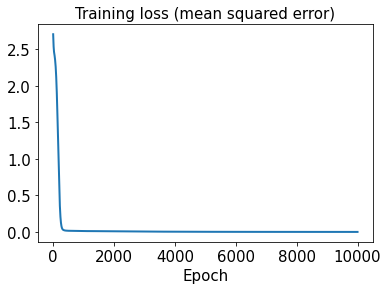

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

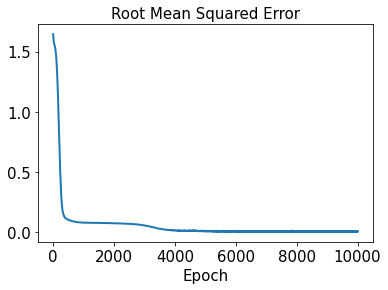

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 61ms/step - loss: 0.0015 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.0033592623854904148


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.0030999331802658158


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.0014322237884390548, 0.006247925152611322, 0.0018745319014574354, 0.004612270023408634, 0.0034885606476728523, 0.005385703898600056, 0.003915476560194175, 0.001035303837802741, 0.0036984804997984423, 0.000693253683479892, 0.0007997277440700062, 0.00830054561194853, 0.001722159984169132, 0.006557500504141918, 0.004861007630574692, 0.007923497308057262, 0.0012946898292929324, 0.002713853790569931, 0.007561449263698141, 0.0011622741821356376, 0.0005138359571954637, 0.007213591460802661, 0.0005968271659385175, 0.0023620811901353496, 0.0009141674830396232, 0.005118674086425007, 0.002535207167179337, 0.003285377252666249, 0.002898303086534554, 0.005949807793910472, 0.004139874708643188, 0.001574709840394416, 0.000449195424792574]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.0021943965376744357, 0.004372011550602506, 0.005662572691660334, 0.002031913545510798, 0.0068791755528384005, 0.00039867661116369955, 0.0030887408863865587, 0.00040914211716311215]


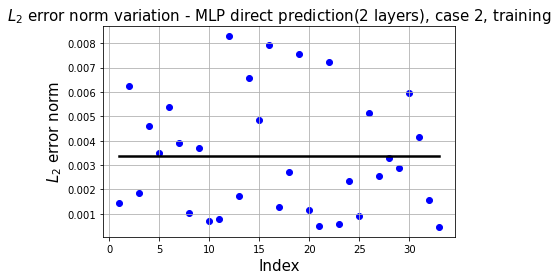

In [65]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

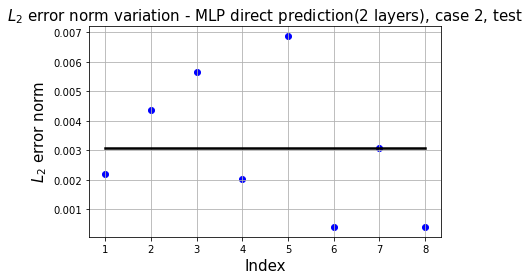

In [66]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

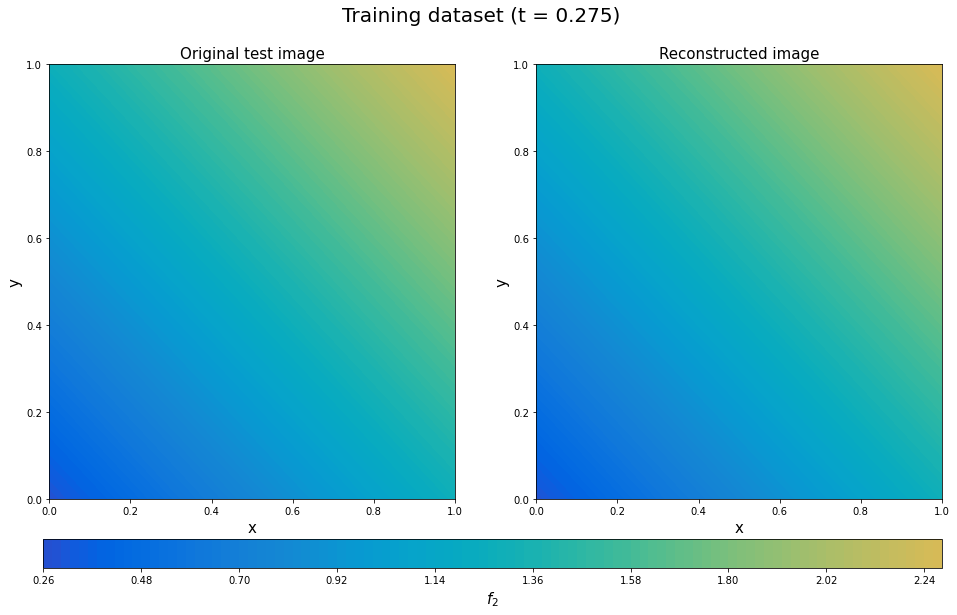

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

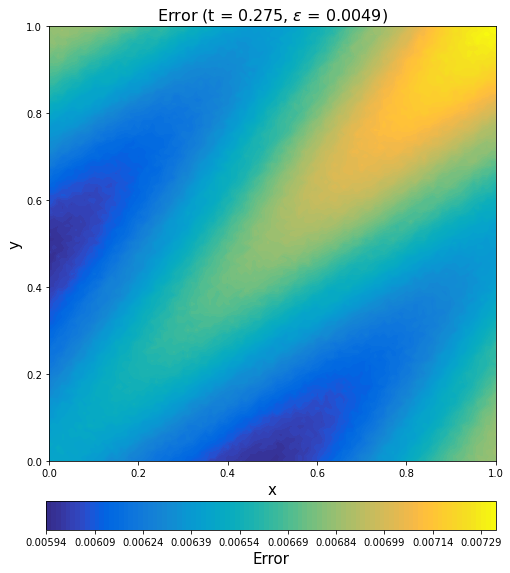

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

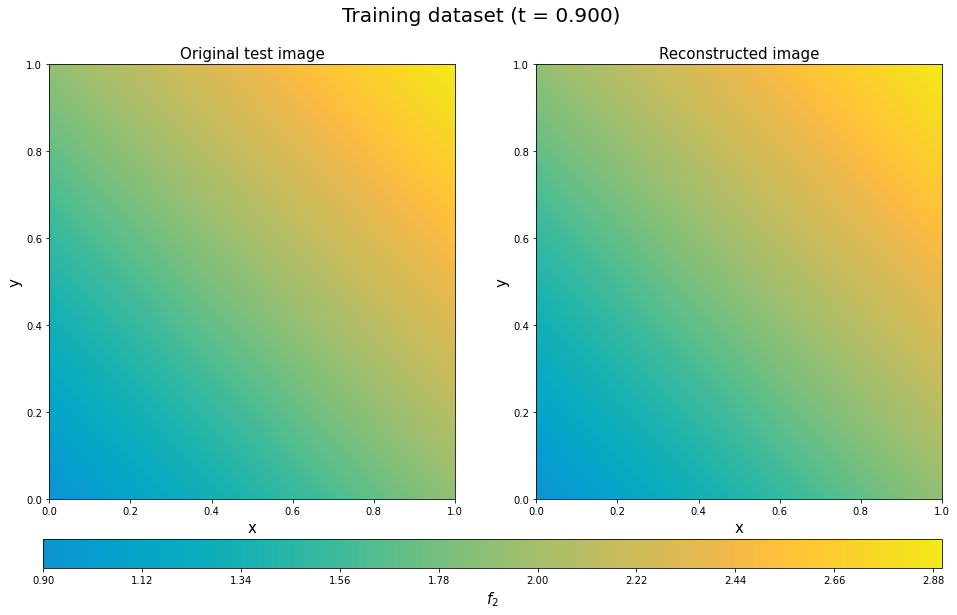

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

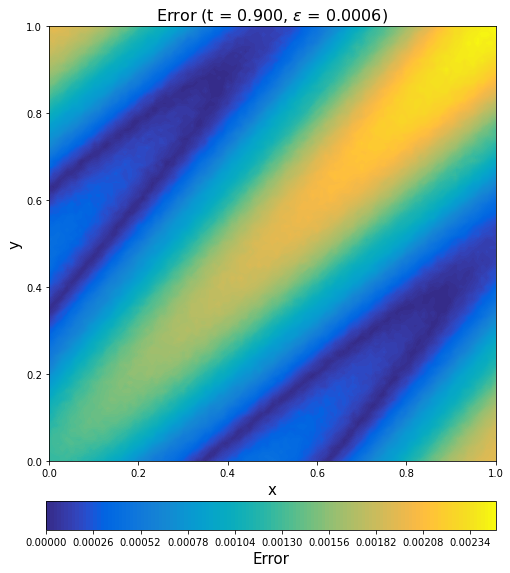

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

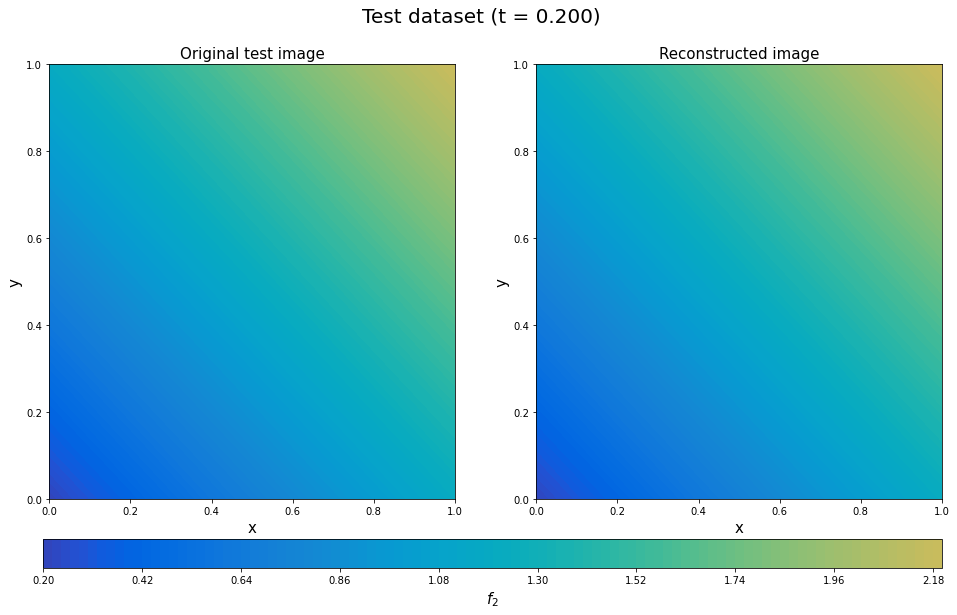

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

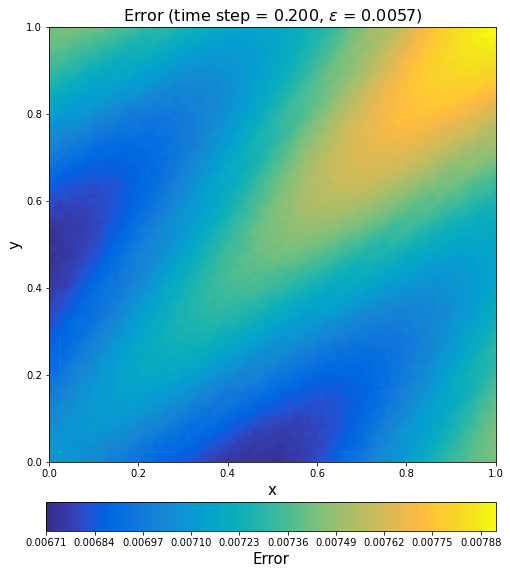

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

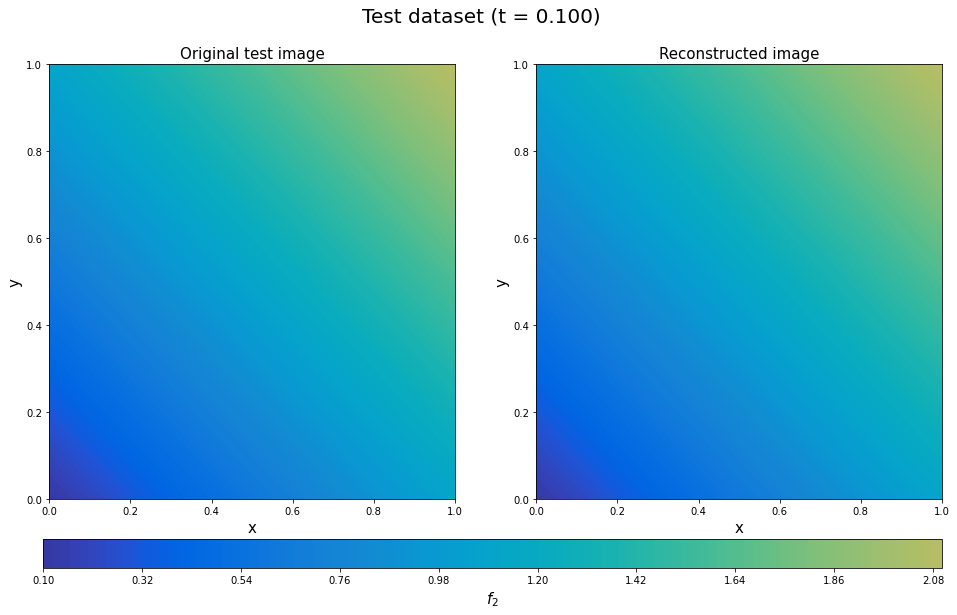

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

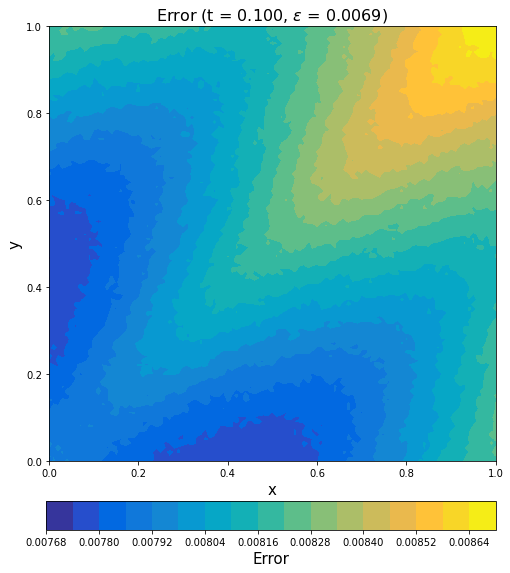

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

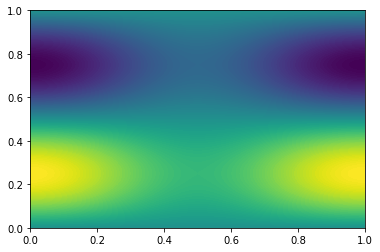

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8903 - rmse: 1.9720
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7900 - rmse: 1.9464
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6932 - rmse: 1.9214
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5993 - rmse: 1.8968
Epoch 5/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5083 - rmse: 1.8727
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4212 - rmse: 1.8493
Epoch 7/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3383 - rmse: 1.8267
Epoch 8/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2572 - rmse: 1.8044
Epoch 9/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1775 - rmse: 1.7822
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1007 - rmse: 1.7605
Epoch 11/10000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2339 - rmse: 1.1102
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2289 - rmse: 1.1079
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2240 - rmse: 1.1057
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2193 - rmse: 1.1036
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2148 - rmse: 1.1016
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2104 - rmse: 1.0996
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2062 - rmse: 1.0977
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2021 - rmse: 1.0958
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1981 - rmse: 1.0939
Epoch 95/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1942 - rmse: 1.0922
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 5ms/step - loss: 1.0539 - rmse: 1.0259
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0532 - rmse: 1.0255
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0524 - rmse: 1.0251
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0517 - rmse: 1.0248
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0509 - rmse: 1.0244
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0502 - rmse: 1.0240
Epoch 176/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0495 - rmse: 1.0237
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0488 - rmse: 1.0234
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0481 - rmse: 1.0230
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0475 - rmse: 1.0227
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0073 - rmse: 1.0029
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0067 - rmse: 1.0026
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0061 - rmse: 1.0023
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0055 - rmse: 1.0020
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0049 - rmse: 1.0017
Epoch 259/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0043 - rmse: 1.0014
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0037 - rmse: 1.0011
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0031 - rmse: 1.0007
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0024 - rmse: 1.0004
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0018 - rmse: 1.0001
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.9290 - rmse: 0.9630
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9277 - rmse: 0.9623
Epoch 340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9263 - rmse: 0.9616
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9250 - rmse: 0.9609
Epoch 342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9236 - rmse: 0.9602
Epoch 343/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.9223 - rmse: 0.9595
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9210 - rmse: 0.9589
Epoch 345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9197 - rmse: 0.9582
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9184 - rmse: 0.9575
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9171 - rmse: 0.9568
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7931 - rmse: 0.8895
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7912 - rmse: 0.8885
Epoch 424/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7893 - rmse: 0.8874
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7875 - rmse: 0.8863
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7856 - rmse: 0.8853
Epoch 427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7836 - rmse: 0.8842
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7816 - rmse: 0.8830
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7795 - rmse: 0.8819
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7774 - rmse: 0.8807
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7753 - rmse: 0.8794
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.6375 - rmse: 0.7971
Epoch 507/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6357 - rmse: 0.7959
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6337 - rmse: 0.7947
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6319 - rmse: 0.7936
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6300 - rmse: 0.7924
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.6282 - rmse: 0.7912
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.6263 - rmse: 0.7900
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6244 - rmse: 0.7888
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6226 - rmse: 0.7876
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6207 - rmse: 0.7865
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.4858 - rmse: 0.6952
Epoch 591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4842 - rmse: 0.6940
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4826 - rmse: 0.6929
Epoch 593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4811 - rmse: 0.6918
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4796 - rmse: 0.6907
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4782 - rmse: 0.6897
Epoch 596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4767 - rmse: 0.6886
Epoch 597/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4752 - rmse: 0.6875
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4737 - rmse: 0.6864
Epoch 599/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4720 - rmse: 0.6852
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.3640 - rmse: 0.6009
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3627 - rmse: 0.5999
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3614 - rmse: 0.5988
Epoch 677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3601 - rmse: 0.5977
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3588 - rmse: 0.5966
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3575 - rmse: 0.5955
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3562 - rmse: 0.5944
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3549 - rmse: 0.5933
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3538 - rmse: 0.5923
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3527 - rmse: 0.5914
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.2760 - rmse: 0.5223
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2751 - rmse: 0.5215
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2742 - rmse: 0.5206
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2733 - rmse: 0.5198
Epoch 762/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2725 - rmse: 0.5190
Epoch 763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2717 - rmse: 0.5182
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2708 - rmse: 0.5174
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2700 - rmse: 0.5165
Epoch 766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2691 - rmse: 0.5156
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2681 - rmse: 0.5147
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.2125 - rmse: 0.4572
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2119 - rmse: 0.4566
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2113 - rmse: 0.4559
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2107 - rmse: 0.4552
Epoch 846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2100 - rmse: 0.4545
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2094 - rmse: 0.4538
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2088 - rmse: 0.4531
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2082 - rmse: 0.4524
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2076 - rmse: 0.4518
Epoch 851/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2070 - rmse: 0.4512
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1747 - rmse: 0.4137
Epoch 927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1743 - rmse: 0.4132
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1739 - rmse: 0.4127
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1735 - rmse: 0.4122
Epoch 930/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1732 - rmse: 0.4118
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1728 - rmse: 0.4113
Epoch 932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1724 - rmse: 0.4109
Epoch 933/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1720 - rmse: 0.4104
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1716 - rmse: 0.4099
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1713 - rmse: 0.4095
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.1509 - rmse: 0.3838
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1507 - rmse: 0.3834
Epoch 1012/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1504 - rmse: 0.3831
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1503 - rmse: 0.3829
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1501 - rmse: 0.3827
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1499 - rmse: 0.3824
Epoch 1016/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1496 - rmse: 0.3821
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1494 - rmse: 0.3818
Epoch 1018/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1492 - rmse: 0.3815
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1490 - rmse: 0.3812
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1331 - rmse: 0.3596
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1329 - rmse: 0.3594
Epoch 1095/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1327 - rmse: 0.3592
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1325 - rmse: 0.3589
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1324 - rmse: 0.3587
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1322 - rmse: 0.3584
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1320 - rmse: 0.3581
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1318 - rmse: 0.3578
Epoch 1101/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1316 - rmse: 0.3575
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1313 - rmse: 0.3572
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1191 - rmse: 0.3396
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1190 - rmse: 0.3393
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1188 - rmse: 0.3391
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1187 - rmse: 0.3389
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1185 - rmse: 0.3387
Epoch 1181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1184 - rmse: 0.3385
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1183 - rmse: 0.3383
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1181 - rmse: 0.3381
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1180 - rmse: 0.3379
Epoch 1185/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1179 - rmse: 0.3378
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1079 - rmse: 0.3226
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1078 - rmse: 0.3224
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1077 - rmse: 0.3222
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1076 - rmse: 0.3220
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1075 - rmse: 0.3219
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1073 - rmse: 0.3217
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1072 - rmse: 0.3215
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1071 - rmse: 0.3213
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1069 - rmse: 0.3211
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1068 - rmse: 0.3209
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0987 - rmse: 0.3078
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0986 - rmse: 0.3077
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0985 - rmse: 0.3075
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0984 - rmse: 0.3073
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0982 - rmse: 0.3071
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0981 - rmse: 0.3070
Epoch 1348/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0980 - rmse: 0.3068
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0979 - rmse: 0.3066
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0978 - rmse: 0.3065
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0977 - rmse: 0.3063
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0906 - rmse: 0.2944
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0905 - rmse: 0.2943
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0904 - rmse: 0.2941
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0903 - rmse: 0.2939
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0902 - rmse: 0.2938
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0901 - rmse: 0.2936
Epoch 1431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0900 - rmse: 0.2934
Epoch 1432/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0900 - rmse: 0.2933
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0899 - rmse: 0.2931
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0897 - rmse: 0.2929
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0836 - rmse: 0.2822
Epoch 1509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0836 - rmse: 0.2821
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0835 - rmse: 0.2821
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0834 - rmse: 0.2819
Epoch 1512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0833 - rmse: 0.2818
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0832 - rmse: 0.2816
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0831 - rmse: 0.2814
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0830 - rmse: 0.2812
Epoch 1516/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0829 - rmse: 0.2810
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0828 - rmse: 0.2809
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0767 - rmse: 0.2696
Epoch 1592/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0766 - rmse: 0.2694
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0765 - rmse: 0.2693
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0765 - rmse: 0.2692
Epoch 1595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0764 - rmse: 0.2690
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0763 - rmse: 0.2689
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0763 - rmse: 0.2688
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0762 - rmse: 0.2686
Epoch 1599/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0761 - rmse: 0.2684
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0760 - rmse: 0.2683
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0706 - rmse: 0.2580
Epoch 1675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0705 - rmse: 0.2578
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0704 - rmse: 0.2576
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0704 - rmse: 0.2575
Epoch 1678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0703 - rmse: 0.2573
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0702 - rmse: 0.2572
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0701 - rmse: 0.2570
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0701 - rmse: 0.2569
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0700 - rmse: 0.2567
Epoch 1683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0699 - rmse: 0.2566
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0652 - rmse: 0.2471
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0651 - rmse: 0.2470
Epoch 1759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0650 - rmse: 0.2468
Epoch 1760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0650 - rmse: 0.2467
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0649 - rmse: 0.2465
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0648 - rmse: 0.2464
Epoch 1763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0648 - rmse: 0.2463
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2462
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2460
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0646 - rmse: 0.2459
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0592 - rmse: 0.2344
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0591 - rmse: 0.2342
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0590 - rmse: 0.2340
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0589 - rmse: 0.2339
Epoch 1844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0588 - rmse: 0.2337
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0588 - rmse: 0.2336
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0587 - rmse: 0.2335
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0587 - rmse: 0.2333
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0586 - rmse: 0.2332
Epoch 1849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0586 - rmse: 0.2332
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0532 - rmse: 0.2212
Epoch 1924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0532 - rmse: 0.2210
Epoch 1925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0531 - rmse: 0.2209
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0530 - rmse: 0.2208
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0530 - rmse: 0.2206
Epoch 1928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0529 - rmse: 0.2205
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0529 - rmse: 0.2204
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0528 - rmse: 0.2202
Epoch 1931/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0527 - rmse: 0.2201
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0527 - rmse: 0.2199
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0478 - rmse: 0.2082
Epoch 2007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0477 - rmse: 0.2080
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0476 - rmse: 0.2078
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0475 - rmse: 0.2076
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0475 - rmse: 0.2074
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0474 - rmse: 0.2073
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - rmse: 0.2071
Epoch 2013/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0473 - rmse: 0.2070
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0472 - rmse: 0.2068
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0472 - rmse: 0.2067
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0422 - rmse: 0.1940
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0421 - rmse: 0.1938
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0421 - rmse: 0.1937
Epoch 2092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0420 - rmse: 0.1934
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0419 - rmse: 0.1933
Epoch 2094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0418 - rmse: 0.1930
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0418 - rmse: 0.1929
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0417 - rmse: 0.1927
Epoch 2097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0416 - rmse: 0.1925
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0416 - rmse: 0.1924
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0366 - rmse: 0.1787
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0366 - rmse: 0.1784
Epoch 2174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0365 - rmse: 0.1782
Epoch 2175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0364 - rmse: 0.1780
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0363 - rmse: 0.1778
Epoch 2177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0363 - rmse: 0.1776
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0362 - rmse: 0.1774
Epoch 2179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0361 - rmse: 0.1771
Epoch 2180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0360 - rmse: 0.1769
Epoch 2181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0360 - rmse: 0.1767
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0316 - rmse: 0.1635
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0316 - rmse: 0.1633
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0315 - rmse: 0.1631
Epoch 2258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0314 - rmse: 0.1629
Epoch 2259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0314 - rmse: 0.1627
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0313 - rmse: 0.1625
Epoch 2261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0313 - rmse: 0.1623
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0312 - rmse: 0.1621
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0311 - rmse: 0.1619
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0311 - rmse: 0.1617
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0267 - rmse: 0.1470
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0266 - rmse: 0.1468
Epoch 2340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0266 - rmse: 0.1466
Epoch 2341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0265 - rmse: 0.1465
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0265 - rmse: 0.1463
Epoch 2343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0264 - rmse: 0.1461
Epoch 2344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0264 - rmse: 0.1459
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1457
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1455
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.1453
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1315
Epoch 2422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0225 - rmse: 0.1313
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0224 - rmse: 0.1311
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0224 - rmse: 0.1309
Epoch 2425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0223 - rmse: 0.1307
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1305
Epoch 2427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0222 - rmse: 0.1303
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1301
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - rmse: 0.1299
Epoch 2430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0221 - rmse: 0.1297
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0191 - rmse: 0.1170
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1168
Epoch 2506/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0190 - rmse: 0.1166
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1164
Epoch 2508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0189 - rmse: 0.1162
Epoch 2509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0189 - rmse: 0.1160
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1158
Epoch 2511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0188 - rmse: 0.1156
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1155
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0187 - rmse: 0.1153
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1037
Epoch 2588/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0163 - rmse: 0.1035
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1033
Epoch 2590/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0162 - rmse: 0.1031
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1030
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1028
Epoch 2593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0161 - rmse: 0.1027
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1025
Epoch 2595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1024
Epoch 2596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0160 - rmse: 0.1022
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0143 - rmse: 0.0925
Epoch 2671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0142 - rmse: 0.0924
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.0922
Epoch 2673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0142 - rmse: 0.0920
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.0918
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.0915
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.0913
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.0910
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0140 - rmse: 0.0908
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.0906
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0795
Epoch 2754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0122 - rmse: 0.0794
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.0793
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0792
Epoch 2757/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.0790
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0789
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.0788
Epoch 2760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0121 - rmse: 0.0787
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0785
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.0784
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0700
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0698
Epoch 2838/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.0697
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0695
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0694
Epoch 2841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.0693
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0692
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0691
Epoch 2844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0107 - rmse: 0.0690
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0689
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0621
Epoch 2920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0620
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0620
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0619
Epoch 2923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0619
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0619
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0618
Epoch 2926/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0099 - rmse: 0.0618
Epoch 2927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0099 - rmse: 0.0618
Epoch 2928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0618
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0553
Epoch 3003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0553
Epoch 3004/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0552
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0552
Epoch 3006/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0551
Epoch 3007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0550
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0550
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0549
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0548
Epoch 3011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0091 - rmse: 0.0548
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0509
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0508
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0509
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0509
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0509
Epoch 3090/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0508
Epoch 3091/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0507
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0506
Epoch 3093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0087 - rmse: 0.0505
Epoch 3094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0087 - rmse: 0.0505
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0466
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0465
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0465
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0464
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0464
Epoch 3173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0083 - rmse: 0.0464
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0464
Epoch 3175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0464
Epoch 3176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0464
Epoch 3177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0464
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0438
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0438
Epoch 3253/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0438
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0438
Epoch 3255/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0438
Epoch 3256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0437
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0436
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0435
Epoch 3259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0434
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0434
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0416
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0418
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0419
Epoch 3337/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0419
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0418
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0417
Epoch 3340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0416
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0414
Epoch 3342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0413
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0412
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0393
Epoch 3418/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0394
Epoch 3419/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0397
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0399
Epoch 3421/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0401
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0403
Epoch 3423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0401
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0396
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0391
Epoch 3426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0389
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0373
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0374
Epoch 3502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0376
Epoch 3503/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0377
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0380
Epoch 3505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0381
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0381
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0381
Epoch 3508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0380
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0378
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0353
Epoch 3584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0352
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0352
Epoch 3586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0352
Epoch 3587/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0352
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0353
Epoch 3589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0353
Epoch 3590/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0354
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0356
Epoch 3592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0357
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0337
Epoch 3667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0338
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0341
Epoch 3669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0344
Epoch 3670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0346
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0346
Epoch 3672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0347
Epoch 3673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0349
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0348
Epoch 3675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0347
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0325
Epoch 3750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0324
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0323
Epoch 3752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0322
Epoch 3753/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0322
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0324
Epoch 3755/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0325
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0327
Epoch 3757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0329
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0329
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0314
Epoch 3833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0315
Epoch 3834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0316
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0318
Epoch 3836/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0322
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0324
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0323
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0318
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0314
Epoch 3841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0311
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0307
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0304
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0302
Epoch 3918/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0302
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0302
Epoch 3920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0302
Epoch 3921/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0303
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0304
Epoch 3923/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0306
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0306
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0291
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0292
Epoch 4000/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0293
Epoch 4001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0293
Epoch 4002/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0291
Epoch 4003/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0290
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0290
Epoch 4005/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0069 - rmse: 0.0291
Epoch 4006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0291
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0292
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 4085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0288
Epoch 4086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0289
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0291
Epoch 4088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0292
Epoch 4089/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0068 - rmse: 0.0291
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0289
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0302
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0297
Epoch 4166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0290
Epoch 4167/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0285
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0283
Epoch 4169/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0284
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0285
Epoch 4171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0286
Epoch 4172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0287
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0287
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0294
Epoch 4248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0287
Epoch 4249/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0281
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0278
Epoch 4251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0277
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0276
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0276
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0277
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0278
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0281
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0267
Epoch 4331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0265
Epoch 4332/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0065 - rmse: 0.0265
Epoch 4333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0263
Epoch 4334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0263
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0263
Epoch 4336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0262
Epoch 4337/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0261
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0261
Epoch 4339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0263
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0257
Epoch 4414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0256
Epoch 4415/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4417/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4419/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0258
Epoch 4497/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0255
Epoch 4498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0252
Epoch 4499/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0251
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0251
Epoch 4501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0253
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0254
Epoch 4503/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0253
Epoch 4504/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0251
Epoch 4505/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0250
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0242
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0242
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0242
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0243
Epoch 4583/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0243
Epoch 4584/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0243
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0244
Epoch 4586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0245
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0245
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0243
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0233
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0232
Epoch 4664/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0232
Epoch 4665/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0233
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0233
Epoch 4667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0233
Epoch 4668/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0235
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0239
Epoch 4670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0245
Epoch 4671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0246
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0243
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0255
Epoch 4747/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0257
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0251
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0239
Epoch 4750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0228
Epoch 4751/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0229
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0231
Epoch 4753/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0233
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0232
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0228
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0228
Epoch 4830/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0228
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0228
Epoch 4832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0227
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0227
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0227
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0227
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0227
Epoch 4837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0228
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0234
Epoch 4912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0230
Epoch 4913/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0226
Epoch 4914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0223
Epoch 4915/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0222
Epoch 4916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0225
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0228
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0232
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0231
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0228
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0219
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0221
Epoch 4996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0220
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0217
Epoch 4998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0215
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0214
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0215
Epoch 5001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0216
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0218
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0218
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0215
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0213
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0213
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0211
Epoch 5081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0210
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0210
Epoch 5083/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0210
Epoch 5084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0210
Epoch 5085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0210
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0210
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0213
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0213
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0212
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0213
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0213
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0213
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0217
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0221
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0222
Epoch 5169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0220
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0216
Epoch 5244/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0210
Epoch 5245/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0207
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0212
Epoch 5247/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0213
Epoch 5248/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0057 - rmse: 0.0210
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0209
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0208
Epoch 5251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0207
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0207
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0223
Epoch 5327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0229
Epoch 5328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0229
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0225
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0222
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0217
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0212
Epoch 5333/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0206
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0206
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0213
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0218
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0224
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0229
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0230
Epoch 5413/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0222
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0209
Epoch 5415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0201
Epoch 5416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0197
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0196
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0197
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0197
Epoch 5493/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0197
Epoch 5494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0197
Epoch 5495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0198
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0200
Epoch 5497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0202
Epoch 5498/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0204
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0201
Epoch 5500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0199
Epoch 5501/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0199
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0193
Epoch 5576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0205
Epoch 5577/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0220
Epoch 5578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0232
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0239
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0228
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0208
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0193
Epoch 5583/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0187
Epoch 5584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0189
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0192
Epoch 5659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0193
Epoch 5660/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0193
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0194
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0197
Epoch 5663/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0201
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0202
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0201
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0201
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0201
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5747/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0184
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0185
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0192
Epoch 5750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0203
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0188
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0187
Epoch 5826/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0190
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0194
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0190
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0187
Epoch 5830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0188
Epoch 5831/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0189
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0190
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0193
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0190
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0199
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0206
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0208
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0198
Epoch 5912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0187
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0186
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0194
Epoch 5915/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0202
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0202
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0201
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0200
Epoch 5992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0193
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0185
Epoch 5994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0181
Epoch 5995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0181
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0180
Epoch 5997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0184
Epoch 5998/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0188
Epoch 5999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0186
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0170
Epoch 6074/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0171
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0172
Epoch 6076/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0173
Epoch 6077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0176
Epoch 6078/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0193
Epoch 6079/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0203
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0206
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0200
Epoch 6082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0181
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0184
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0187
Epoch 6158/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0183
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0178
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0174
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0173
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0177
Epoch 6163/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0180
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0188
Epoch 6165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0196
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0181
Epoch 6240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048 - rmse: 0.0184
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0182
Epoch 6242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0179
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0176
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0176
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0183
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0191
Epoch 6247/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0191
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0187
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0168
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0168
Epoch 6324/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0168
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0170
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0174
Epoch 6327/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0181
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0185
Epoch 6329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0184
Epoch 6330/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0181
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0174
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0175
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0176
Epoch 6407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0177
Epoch 6408/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0176
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0178
Epoch 6410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0175
Epoch 6411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0175
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0176
Epoch 6413/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0175
Epoch 6414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0174
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0163
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0164
Epoch 6490/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0165
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0164
Epoch 6492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0163
Epoch 6493/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0162
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0161
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0162
Epoch 6496/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0163
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0168
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0173
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0167
Epoch 6573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0163
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0163
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0167
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0174
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0179
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0179
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0177
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0173
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0174
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0173
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0173
Epoch 6657/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0182
Epoch 6658/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0186
Epoch 6659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0179
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0164
Epoch 6661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0157
Epoch 6662/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0161
Epoch 6663/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0164
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0182
Epoch 6738/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0175
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0166
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0158
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0157
Epoch 6742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0160
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0161
Epoch 6744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0163
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0164
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0161
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0156
Epoch 6821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0156
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0155
Epoch 6823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0154
Epoch 6824/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0154
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0154
Epoch 6826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0158
Epoch 6827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0166
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0167
Epoch 6829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0165
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0161
Epoch 6904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0160
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0159
Epoch 6906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0158
Epoch 6907/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0157
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0157
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0156
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0157
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0160
Epoch 6912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0165
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0166
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0166
Epoch 6988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0170
Epoch 6989/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0171
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0171
Epoch 6991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0173
Epoch 6992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0174
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0167
Epoch 6994/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0162
Epoch 6995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0161
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0161
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0167
Epoch 7071/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0165
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0157
Epoch 7073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0153
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0152
Epoch 7075/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0155
Epoch 7076/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0161
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0163
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0161
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0155
Epoch 7153/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0153
Epoch 7154/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0152
Epoch 7155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0153
Epoch 7156/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0155
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0156
Epoch 7158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0156
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0155
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0154
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0154
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0157
Epoch 7236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0159
Epoch 7237/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0159
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0157
Epoch 7239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0156
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0156
Epoch 7241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0157
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0158
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0159
Epoch 7244/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0159
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0166
Epoch 7319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0172
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0174
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0174
Epoch 7322/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0166
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0159
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0158
Epoch 7325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0157
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0157
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0161
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0148
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0151
Epoch 7403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0153
Epoch 7404/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0152
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0152
Epoch 7406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0153
Epoch 7407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0150
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0148
Epoch 7409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0149
Epoch 7410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0154
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0156
Epoch 7485/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0190
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0215
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0204
Epoch 7488/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0168
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0151
Epoch 7490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0170
Epoch 7491/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0040 - rmse: 0.0186
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0183
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0167
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0174
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0178
Epoch 7569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0175
Epoch 7570/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0170
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0163
Epoch 7572/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0038 - rmse: 0.0156
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0147
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0142
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0142
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0143
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0150
Epoch 7651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0152
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0147
Epoch 7653/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0159
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0175
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0171
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0155
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0146
Epoch 7658/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0151
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0155
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0193
Epoch 7734/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0201
Epoch 7735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0180
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0155
Epoch 7737/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0142
Epoch 7738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0152
Epoch 7739/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0165
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0169
Epoch 7741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0156
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0144
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0153
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0155
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0156
Epoch 7819/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0156
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0155
Epoch 7821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0153
Epoch 7822/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0156
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0178
Epoch 7824/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0180
Epoch 7825/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0161
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0170
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0171
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0161
Epoch 7902/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0150
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0152
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0160
Epoch 7905/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0162
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0157
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0151
Epoch 7908/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0153
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0149
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0151
Epoch 7984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0152
Epoch 7985/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0152
Epoch 7986/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0151
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0149
Epoch 7988/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0148
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0156
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0173
Epoch 7991/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0179
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0146
Epoch 8066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0161
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0171
Epoch 8068/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0168
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0157
Epoch 8070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0150
Epoch 8071/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0147
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0146
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0143
Epoch 8074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0142
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0142
Epoch 8149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0140
Epoch 8150/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0139
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0139
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0139
Epoch 8153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0138
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0137
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0142
Epoch 8156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0153
Epoch 8157/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0166
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0204
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0197
Epoch 8233/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0177
Epoch 8234/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0155
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0143
Epoch 8236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0149
Epoch 8237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0174
Epoch 8238/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037 - rmse: 0.0195
Epoch 8239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0189
Epoch 8240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0167
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0143
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0140
Epoch 8316/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0139
Epoch 8317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0140
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0141
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0140
Epoch 8320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0140
Epoch 8321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0141
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0147
Epoch 8323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0153
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0144
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0141
Epoch 8399/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0139
Epoch 8400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0145
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0150
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0144
Epoch 8403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0138
Epoch 8404/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0145
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0154
Epoch 8406/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0156
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0140
Epoch 8481/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0145
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0157
Epoch 8483/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0163
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0159
Epoch 8485/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0147
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0141
Epoch 8487/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0162
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0170
Epoch 8489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0152
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0146
Epoch 8564/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0147
Epoch 8565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0148
Epoch 8566/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0150
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0148
Epoch 8568/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0146
Epoch 8570/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0146
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0142
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0143
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0143
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0146
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0154
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0158
Epoch 8732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0157
Epoch 8733/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0151
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0144
Epoch 8736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0150
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0152
Epoch 8738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0149
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0170
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0167
Epoch 8814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0154
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0143
Epoch 8816/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0148
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0145
Epoch 8818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0140
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0143
Epoch 8820/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0147
Epoch 8821/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0142
Epoch 8896/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0151
Epoch 8897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0154
Epoch 8898/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0150
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0143
Epoch 8900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0140
Epoch 8901/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0139
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0140
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0140
Epoch 8904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0140
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0143
Epoch 8979/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0135
Epoch 8980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0136
Epoch 8981/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0139
Epoch 8982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0143
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0150
Epoch 8984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0142
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0135
Epoch 8986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0145
Epoch 8987/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0147
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0183
Epoch 9062/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0195
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0179
Epoch 9064/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0145
Epoch 9065/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0146
Epoch 9066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0177
Epoch 9067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0178
Epoch 9068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0156
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0139
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0131
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0141
Epoch 9145/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0141
Epoch 9146/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0142
Epoch 9147/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0141
Epoch 9148/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0141
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0150
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0153
Epoch 9151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0145
Epoch 9152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0138
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0145
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0136
Epoch 9228/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0139
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0141
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0139
Epoch 9231/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0138
Epoch 9232/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0137
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0154
Epoch 9234/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0175
Epoch 9235/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0163
Epoch 9236/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0140
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0136
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0135
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0135
Epoch 9313/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0134
Epoch 9314/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0139
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0144
Epoch 9316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0143
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0140
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0140
Epoch 9319/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0139
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0183
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0170
Epoch 9395/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0145
Epoch 9396/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0133
Epoch 9397/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0133
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0132
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0140
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0147
Epoch 9401/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0147
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0144
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 9477/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0133
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0132
Epoch 9479/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0138
Epoch 9480/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0154
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0165
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0162
Epoch 9483/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0148
Epoch 9484/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0134
Epoch 9485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0133
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0173
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0147
Epoch 9561/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0140
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0152
Epoch 9563/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 9564/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0145
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 9566/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0165
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0167
Epoch 9568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0151
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0129
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0133
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 9645/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0142
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0139
Epoch 9647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 9648/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0141
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0136
Epoch 9650/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0131
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0129
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0139
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0144
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0160
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0162
Epoch 9729/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0147
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0136
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0149
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0141
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0134
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0143
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0131
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0156
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0168
Epoch 9811/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0163
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0147
Epoch 9813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0134
Epoch 9814/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0129
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0130
Epoch 9816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0132
Epoch 9817/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0132
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0147
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0145
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0143
Epoch 9894/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0143
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0145
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0152
Epoch 9897/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0154
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0151
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0145
Epoch 9900/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0144
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0168
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0148
Epoch 9976/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0126
Epoch 9977/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0136
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0136
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0125
Epoch 9980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0130
Epoch 9981/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0149
Epoch 9982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0157
Epoch 9983/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0141
Epoch 9984/10000
2/2 [===============

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:43.653352


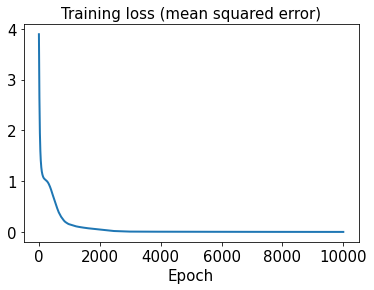

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

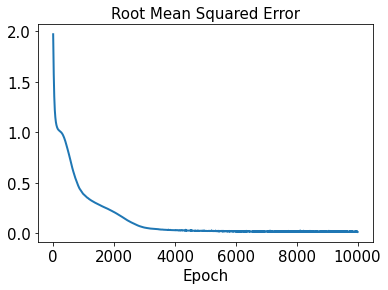

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 57ms/step - loss: 0.0027 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.012739852963472515


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.009927237049528847


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.005171501913984353, 0.0018544551996436895, 0.014454677499161633, 0.014278852592104147, 0.00834495189584231, 0.010286640545272065, 0.012792156700458503, 0.0018510124666013047, 0.010933348087361782, 0.0030914143374827143, 0.002592944587306893, 0.027376571430532112, 0.010881836407793118, 0.002564986517077097, 0.013515639013497959, 0.021666479065243088, 0.0031707380746097266, 0.002491215473055875, 0.01629359343984781, 0.001993968599436896, 0.005863492810033957, 0.011282397501194792, 0.004081014874551552, 0.006248440200059439, 0.002210338148793927, 0.012174715599326839, 0.0039695190925709105, 0.0050258504526920714, 0.0017729960782566527, 0.005011128506276275, 0.013948515180983457, 0.007772075218205653, 0.008525696278980078]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.009329128707566088, 0.01443351936270146, 0.007883948288164166, 0.013227314069054035, 0.0066673573980707565, 0.016496684403626678, 0.0015009106664646277, 0.012069128689524273]


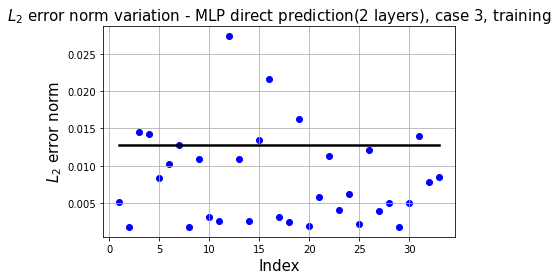

In [95]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

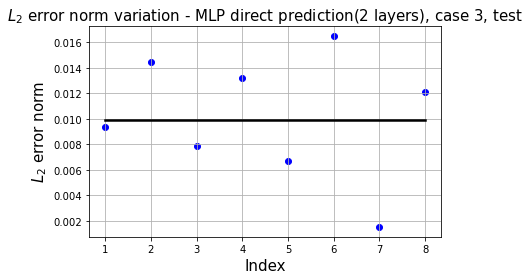

In [96]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(2 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

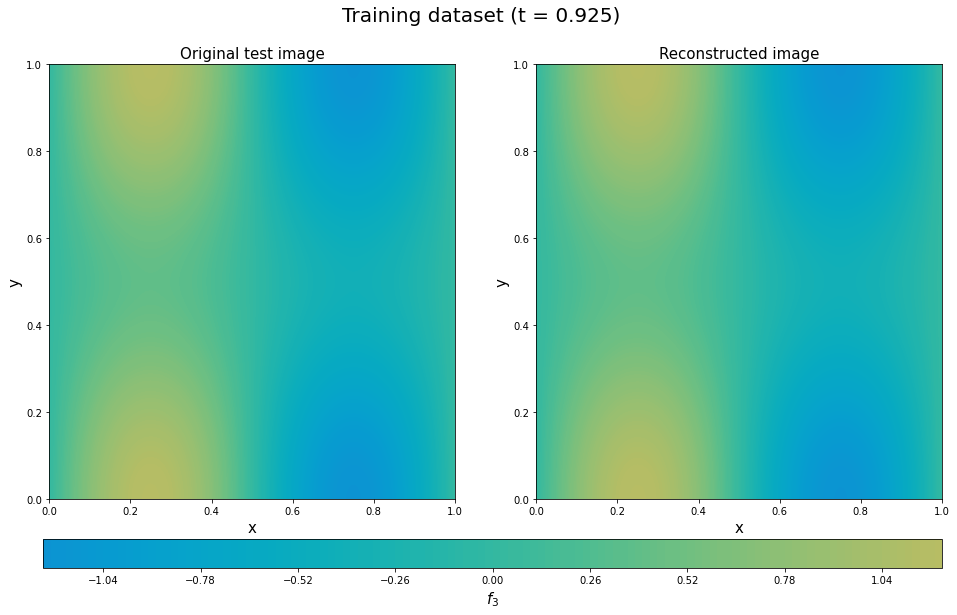

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

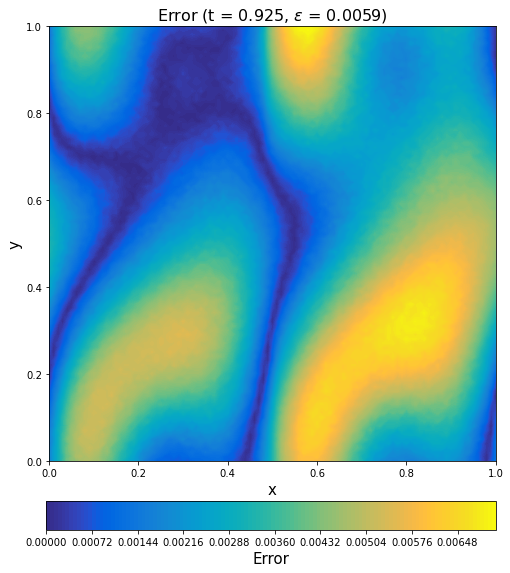

In [107]:
#error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)
error_train_abs3_rotate20 = np.abs(decoded_train3[20]-y_train3[20]).T.reshape(101,101)
cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

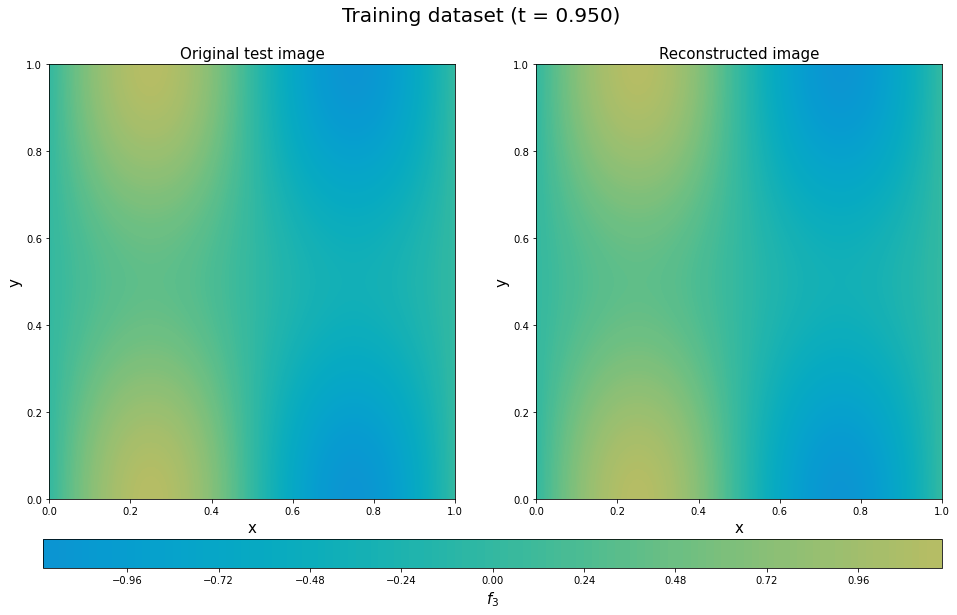

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

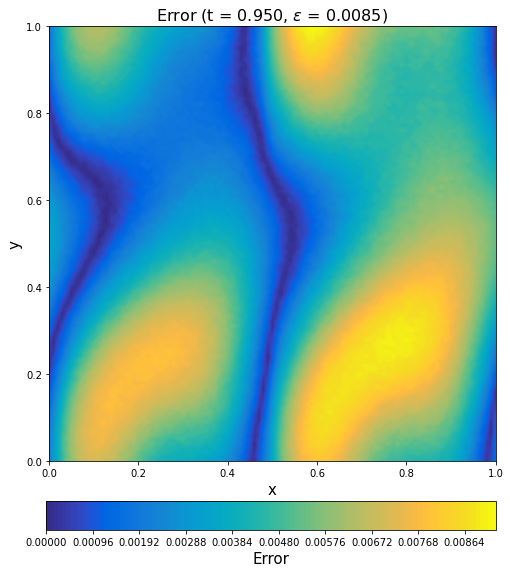

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

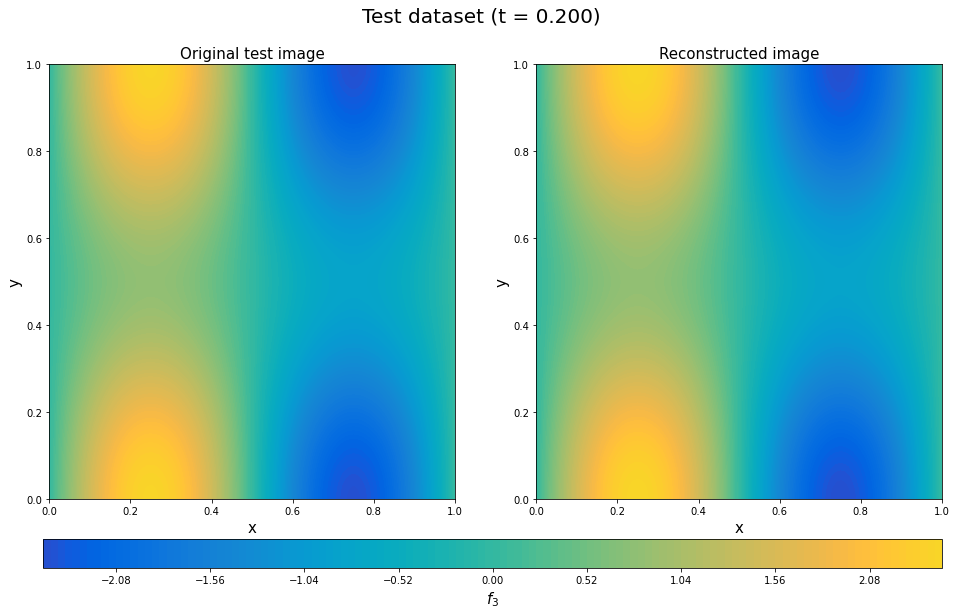

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

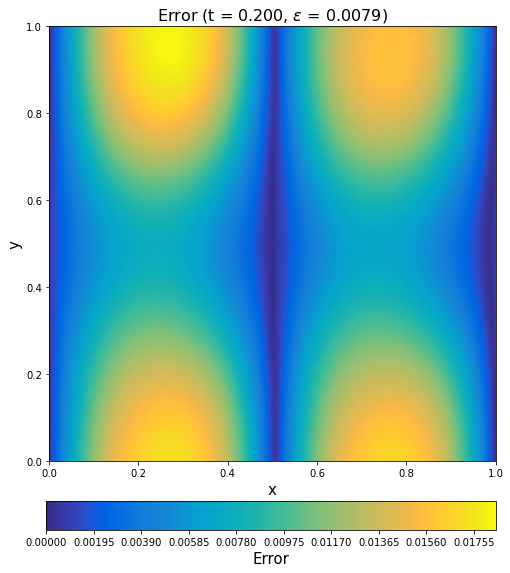

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

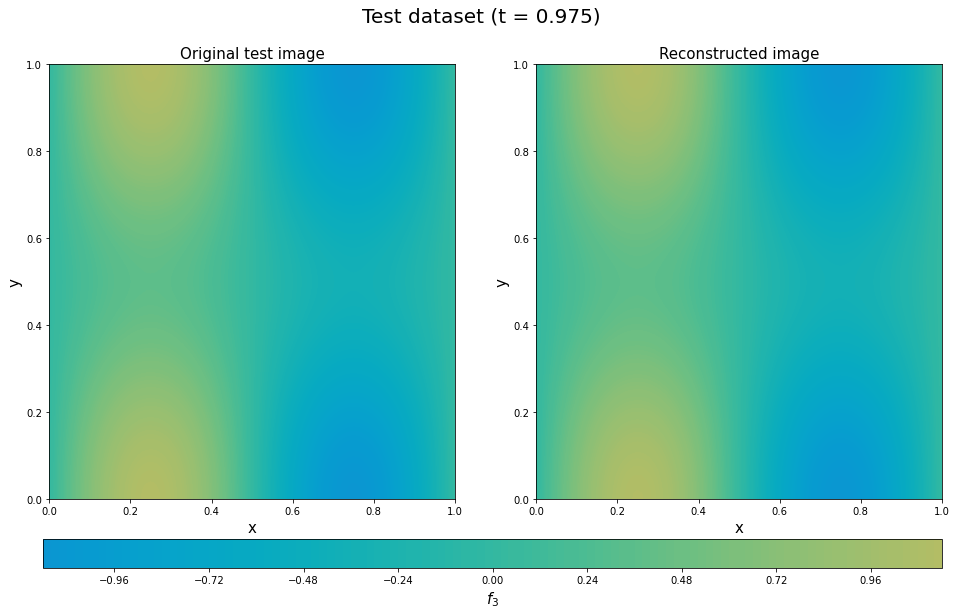

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

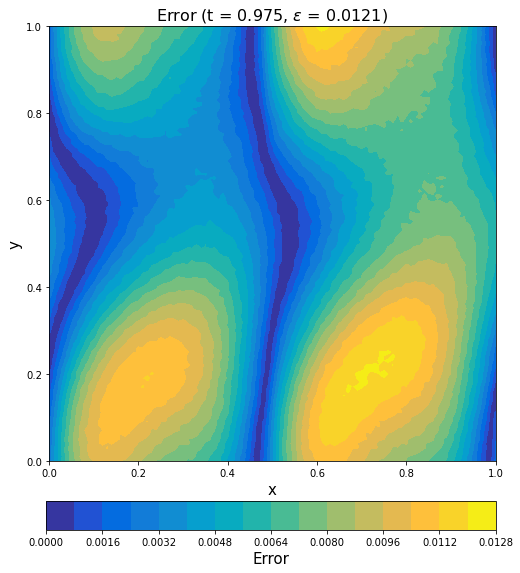

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()